# ANALISI DEGLI SPETTRI ODMR

Gli spettri sono stati allineati; c'è un file per ogni distanza del magnete.
 Ora c'è da analizzare, incrociare con il campo magentico e altre cose. Procediamo per gradi. 

In [77]:
from analysis_subroutines import *

def build_name (dist):
    return f"data/cristallo2_aligned/odmr_dist_{dist}.csv"

distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40, 1000]

## MANIPOLAZIONE DEL BACKGROUND

Fittiamo il segnale per ripulire il background. L'andamento generale somiglia a una retta + sinusoide con periodo proporzionale a x. Vengono provate diverse combinazioni di polinomio + seno. 

### Cubica

Sicuramente possiamo partire da una certezza: va sottratto un polinomio all'intero spettro, perché ha una sorta di 'pendenza' da un lato all'altro. Una retta non è sufficiente però; si sceglie di usare una cubica.

In [78]:
# la regione sinusoidale a sinistra dipende dalla distanza
vec_regione_sx = [(2500,2580),(2500,2560),(2500,2560),(2500,2575),
              (2500,2535),(2500,2555),(2500,2555),(2500,2530),
              (2500,2660),(2500,2550)]
vec_regione_dx = [(2620,2750),(2627,2750),(2620,2750),(2660,2750), 
              (2640,2750),(2660,2750),(2660,2750),(2660,2750),
              (2680,2750),(2700,2750)]

È poco efficiente ma leggo prima gli spettri e li immagazzino, tutto ciò per normalizzare rispetto al deep più basso di tutti. *OCCHIO*: la normalizzazione va fatta **dopo** la sottrazione della cubica.

In [79]:
spettri = []

for i, dist in enumerate( reversed(distanze) ):
    nome = build_name(dist)
    spettro = leggi_file_odmr(nome) 
    spettri.append(spettro)

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 4.57659499e-09 -3.56936587e-05  9.26523979e-02 -7.90263605e+01]


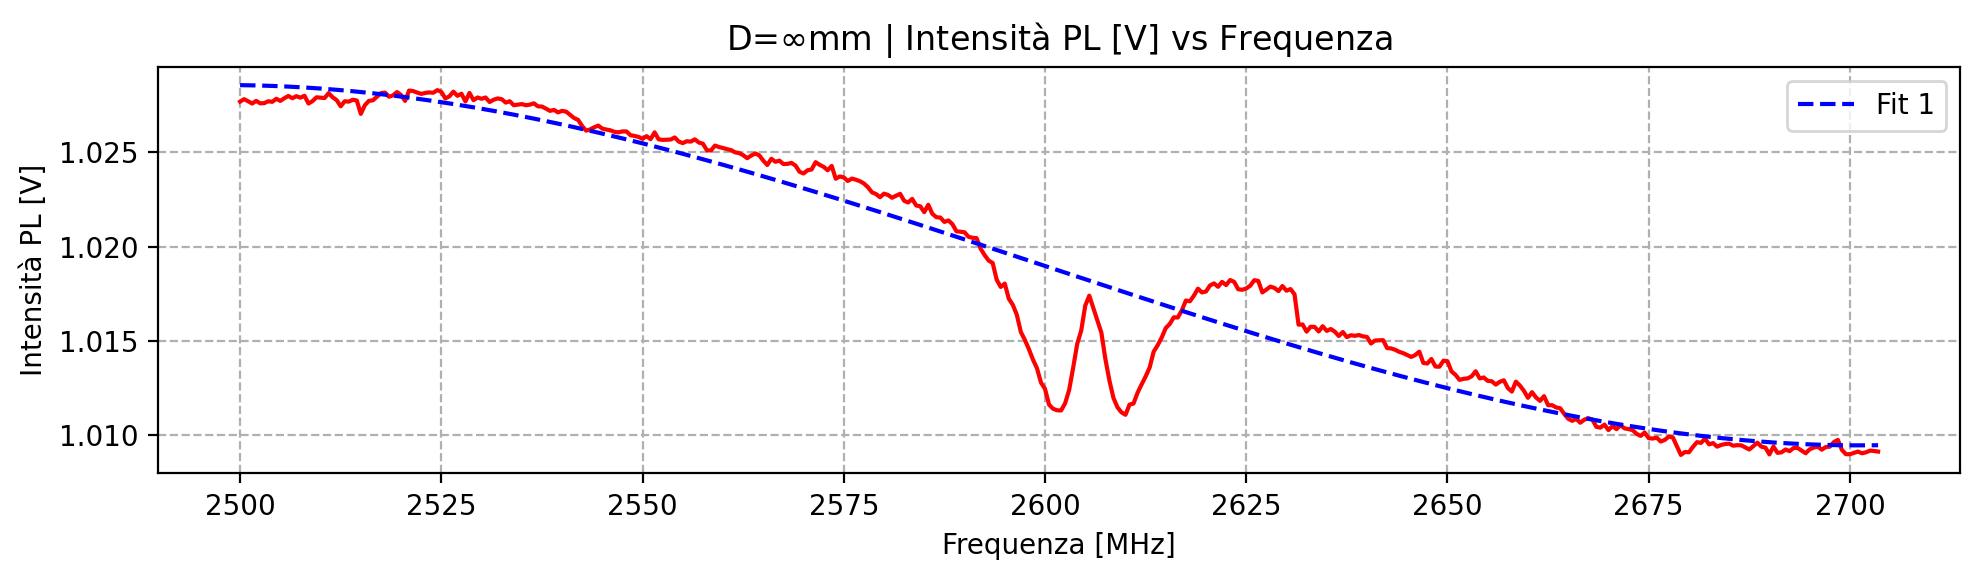

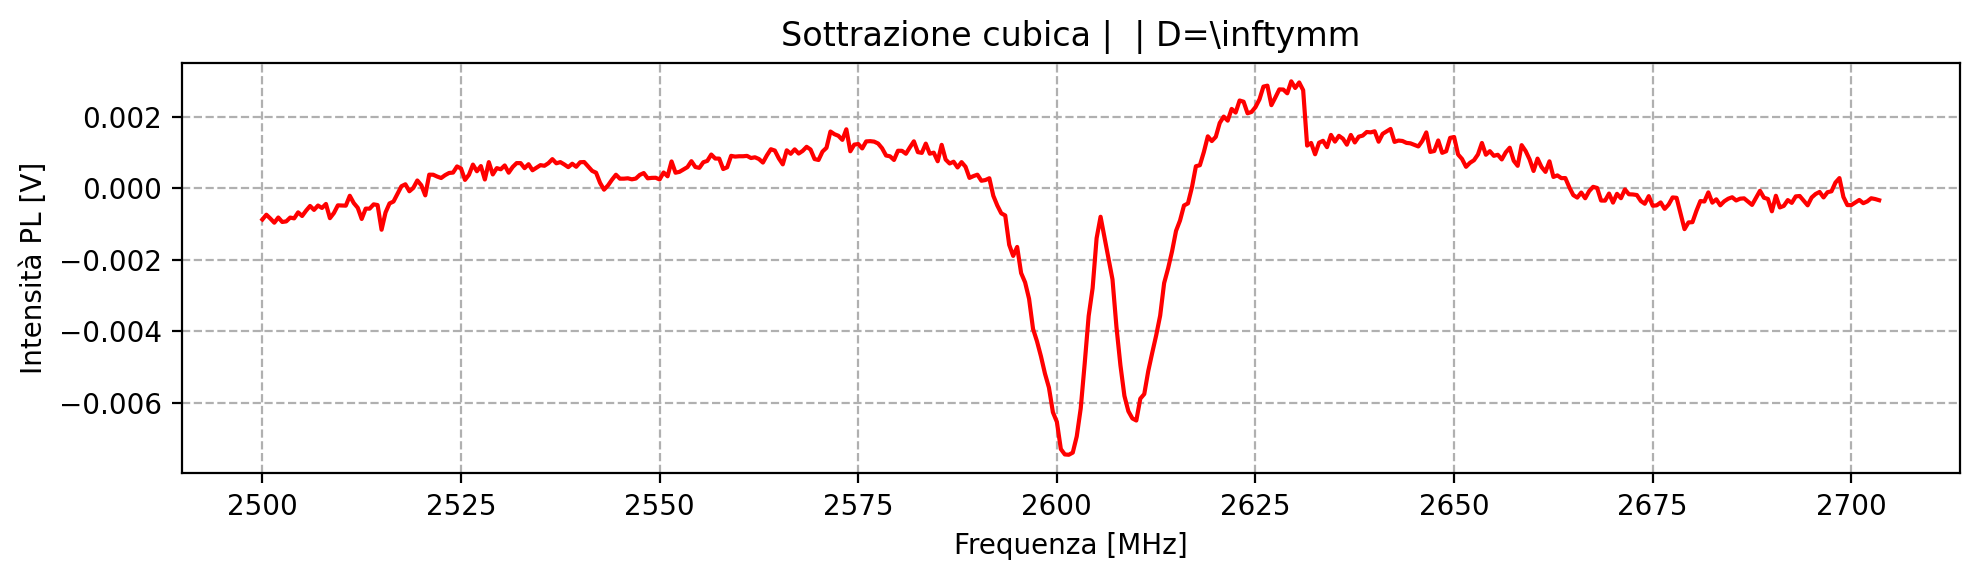

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-2.44172273e-09  1.98466476e-05 -5.36767800e-02  4.98444675e+01]


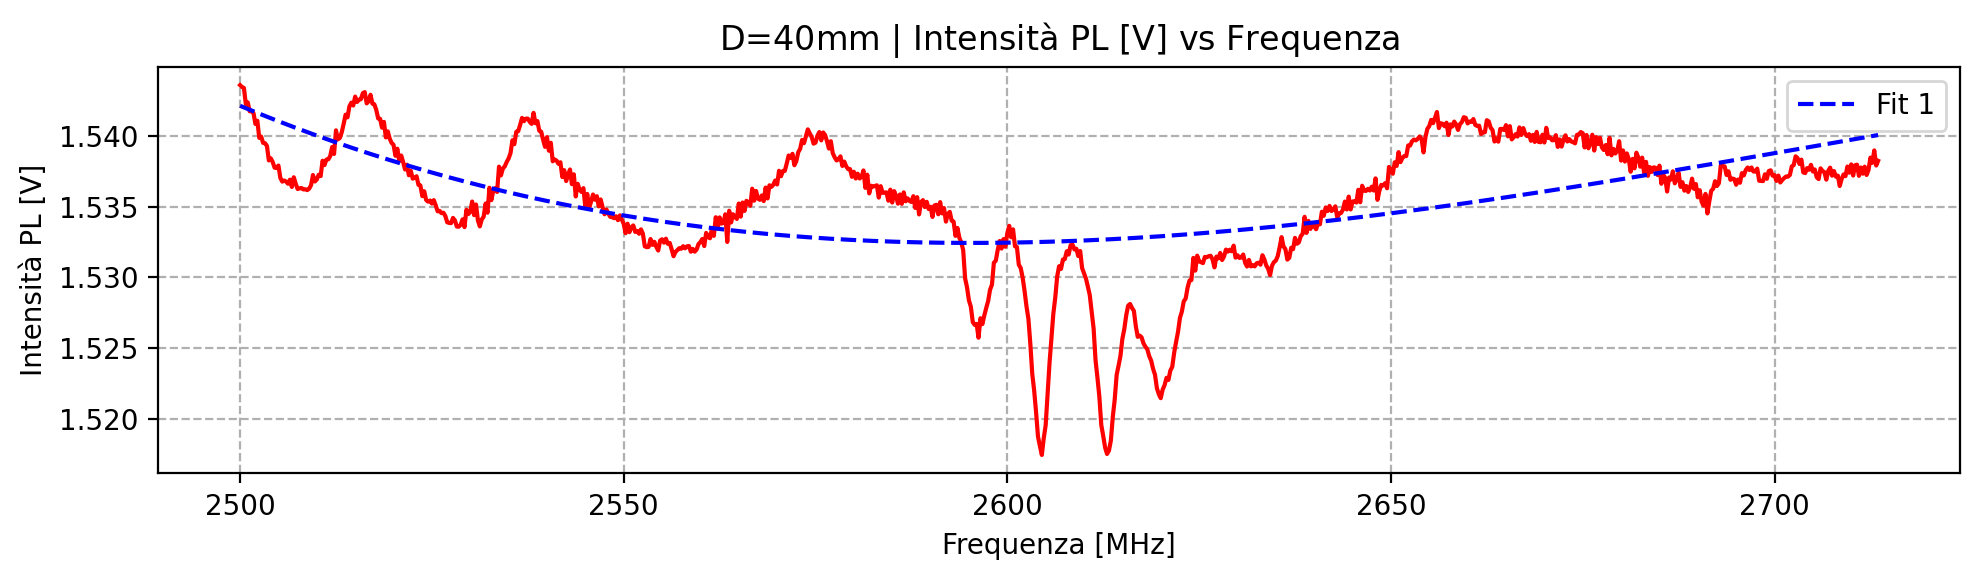

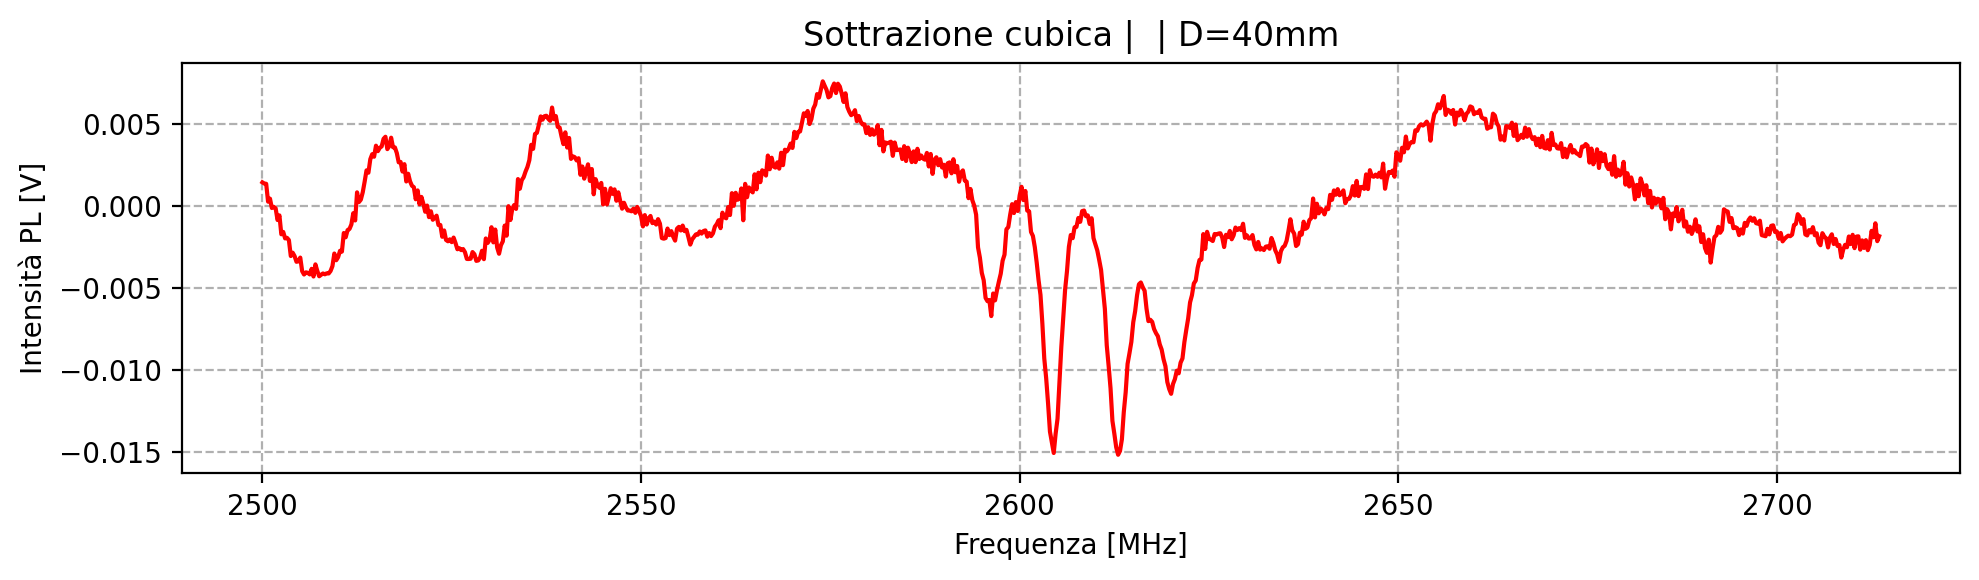

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 6.00002234e-09 -4.71878014e-05  1.23700361e-01 -1.06804268e+02]


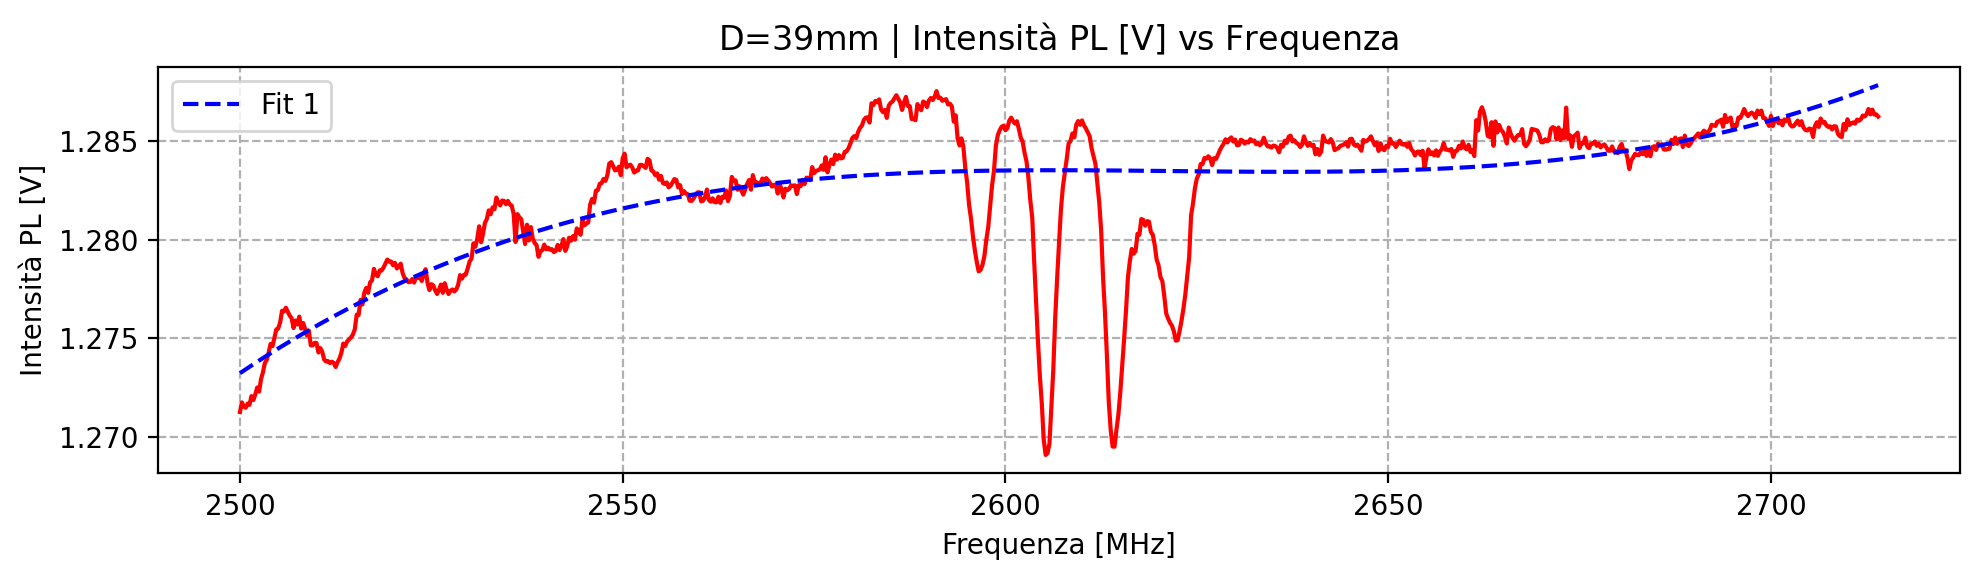

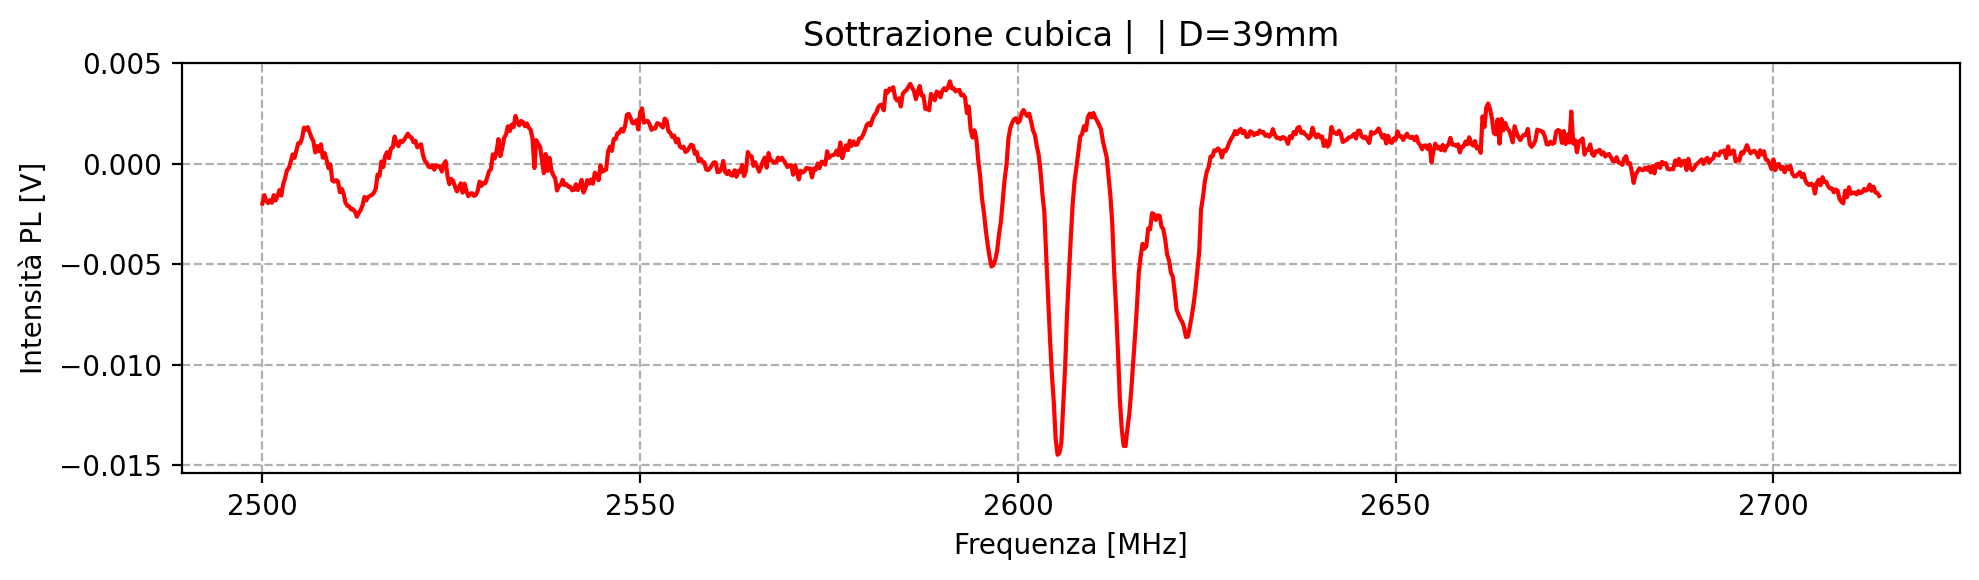

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 1.38854796e-09 -1.05982136e-05  2.69408200e-02 -2.17137151e+01]


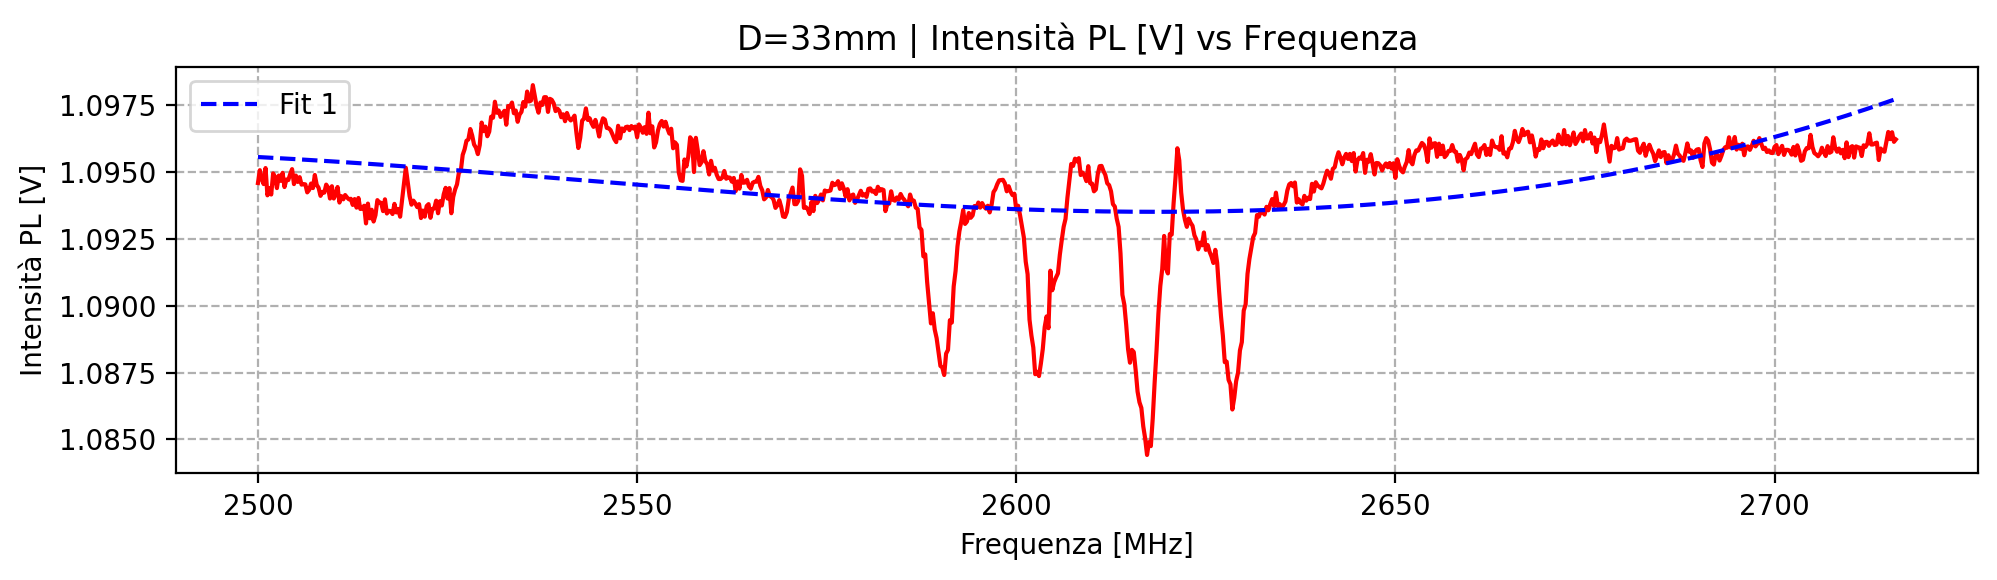

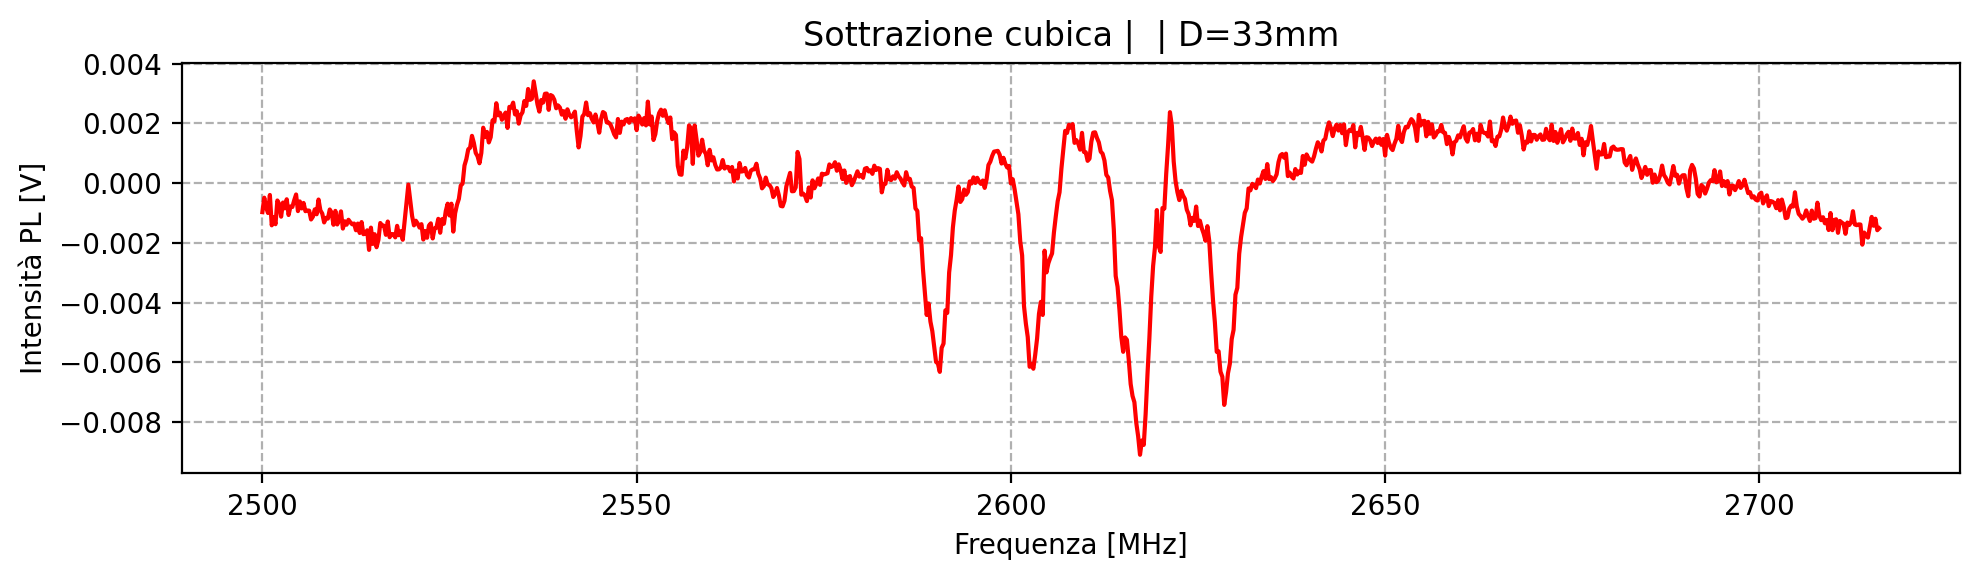

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 6.00411059e-09 -4.68972005e-05  1.22099642e-01 -1.04788581e+02]


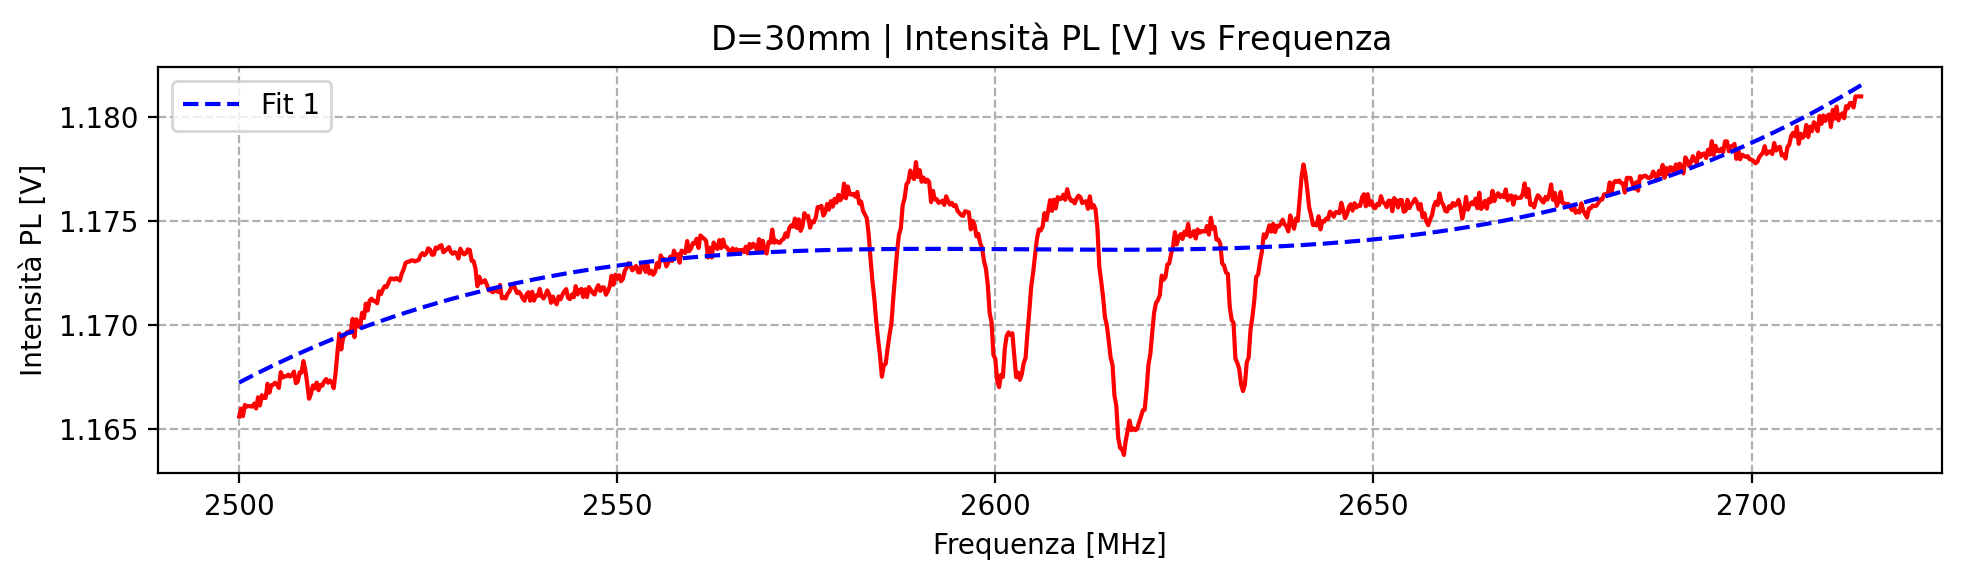

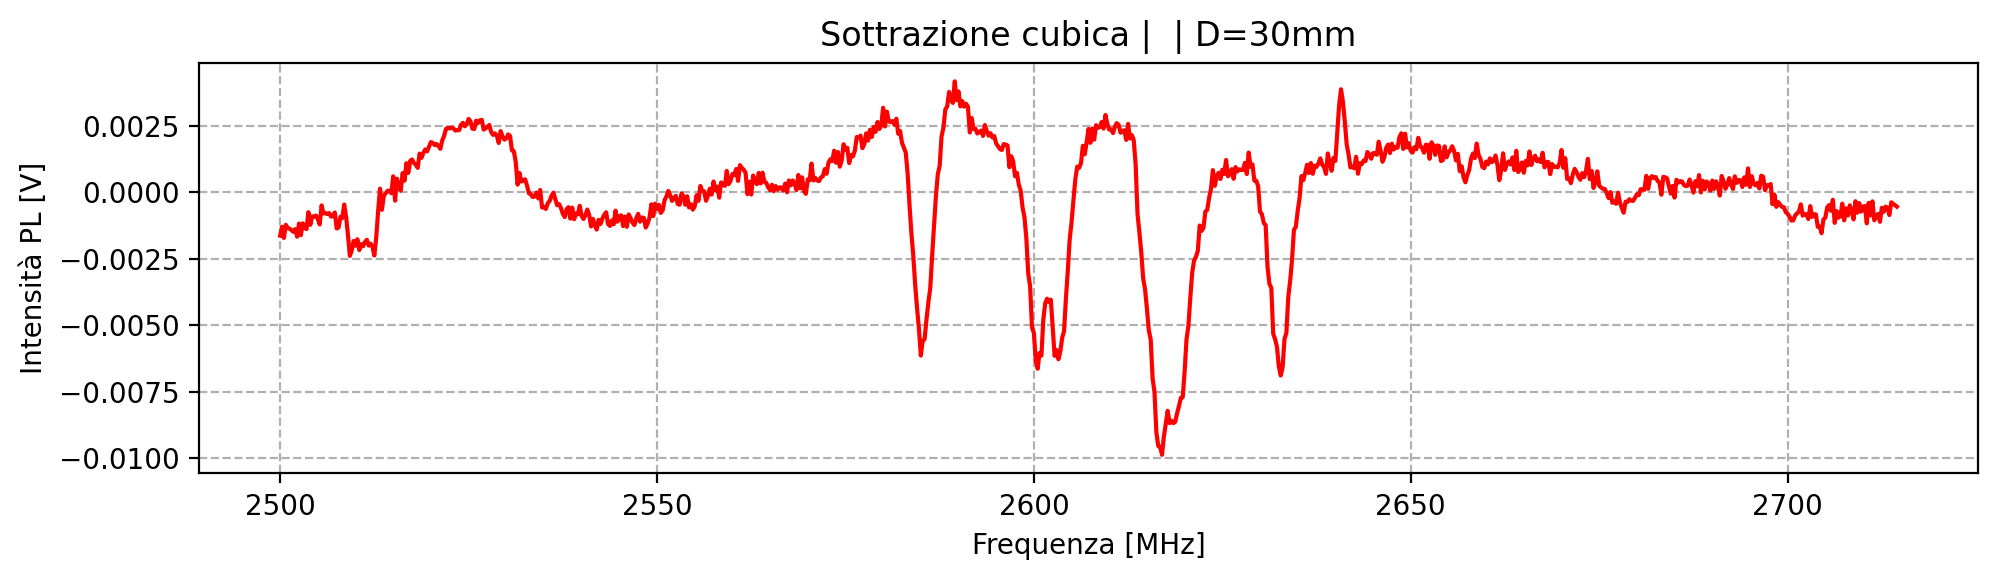

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-1.77554042e-10  1.26378399e-06 -2.92743076e-03  3.44591688e+00]


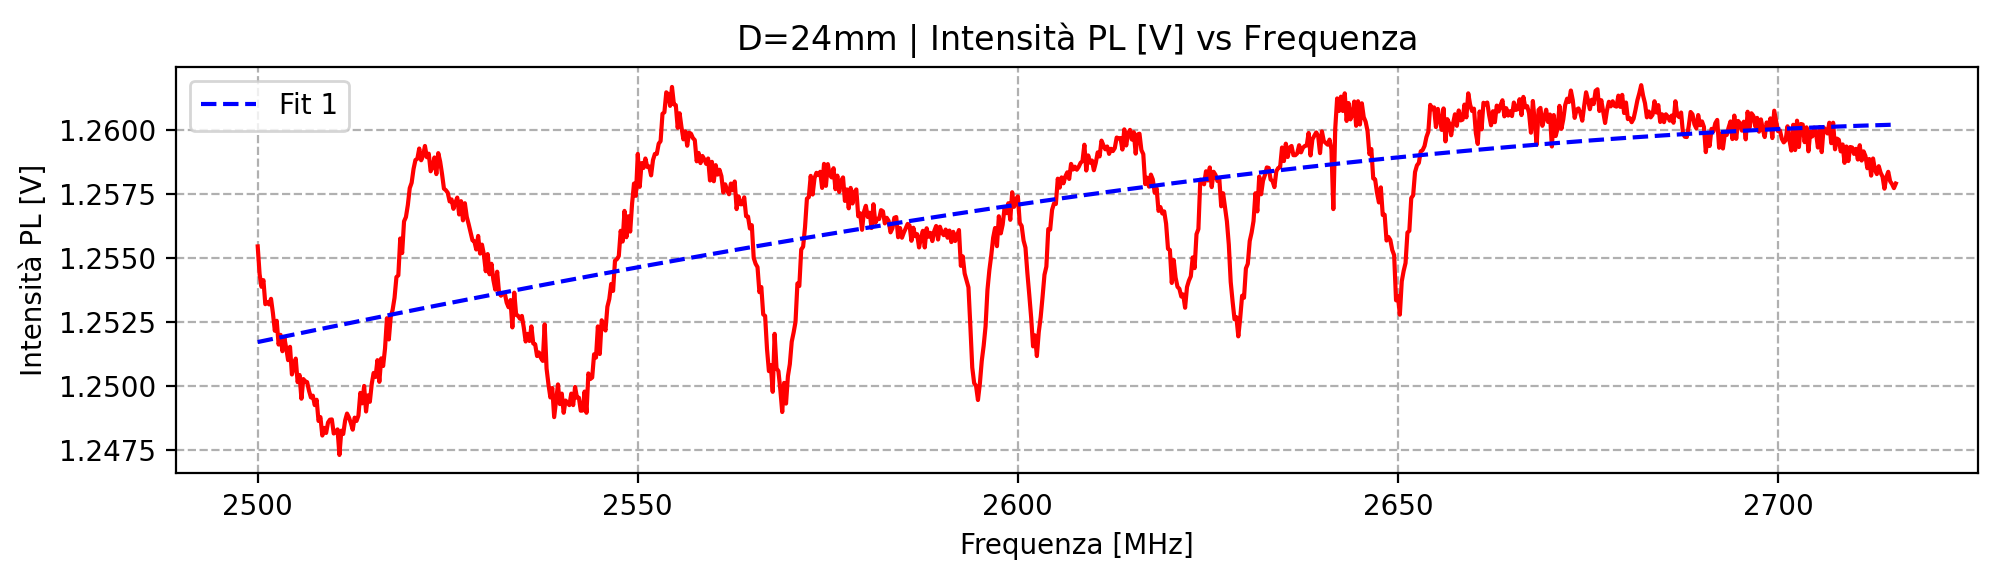

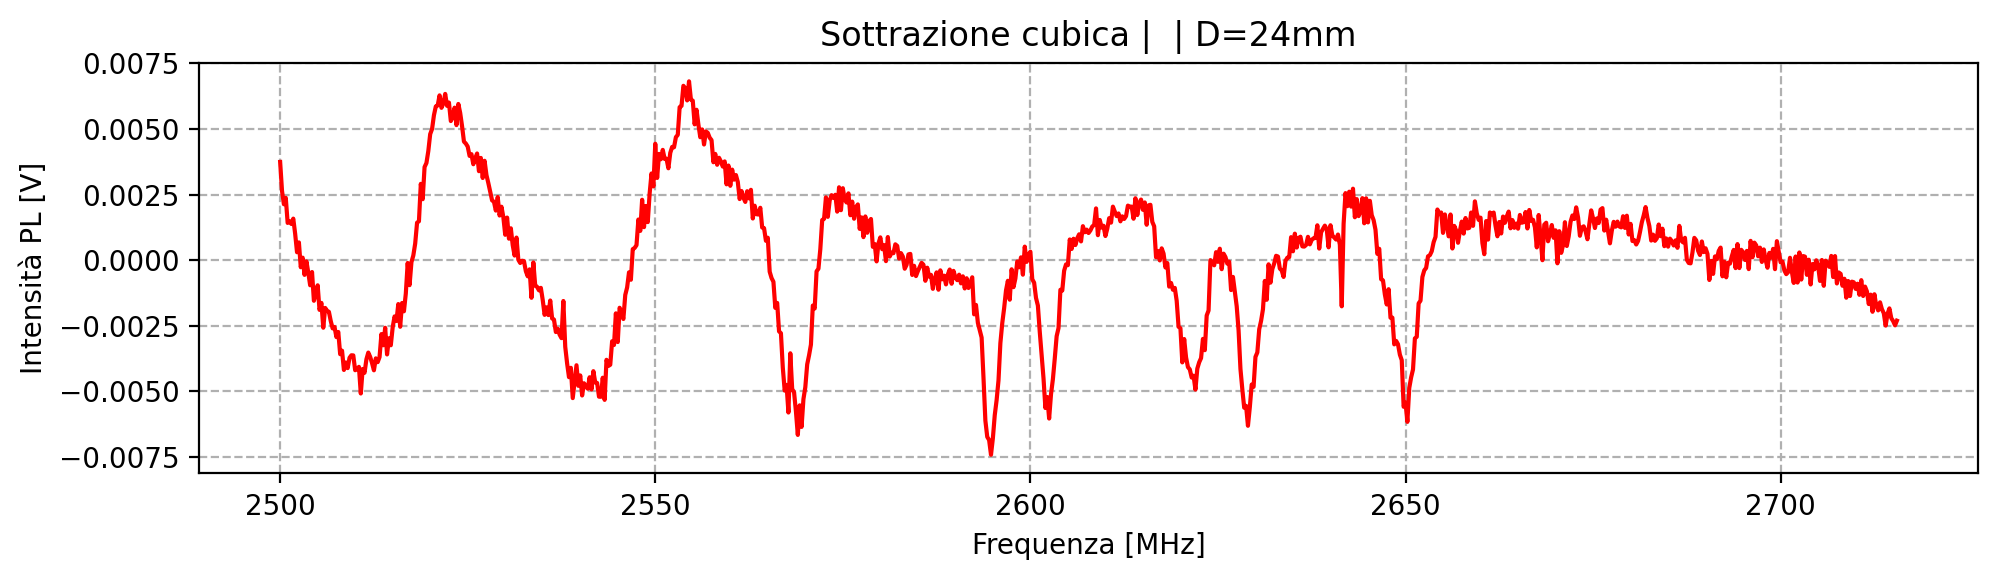

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-2.71999068e-09  2.17901571e-05 -5.80086575e-02  5.32054984e+01]


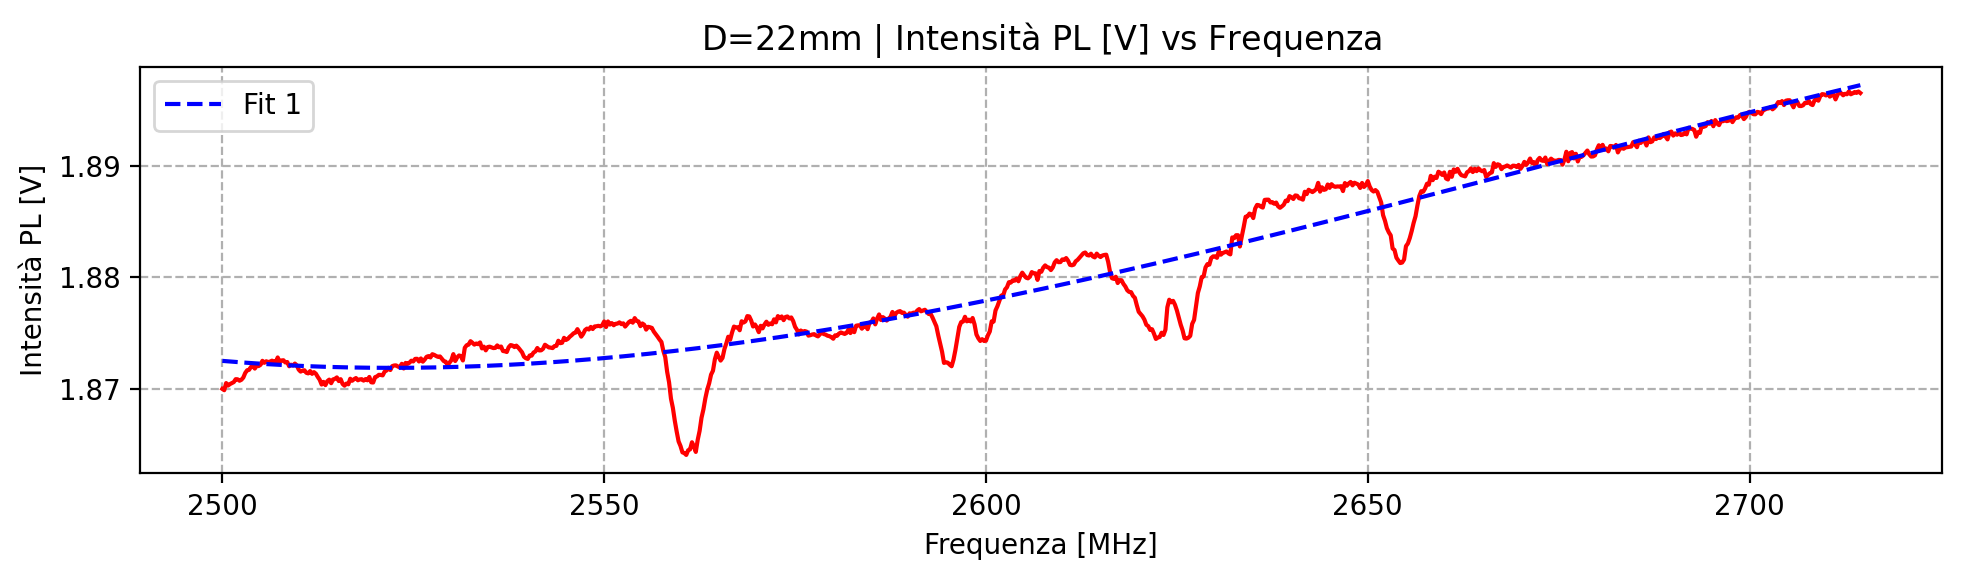

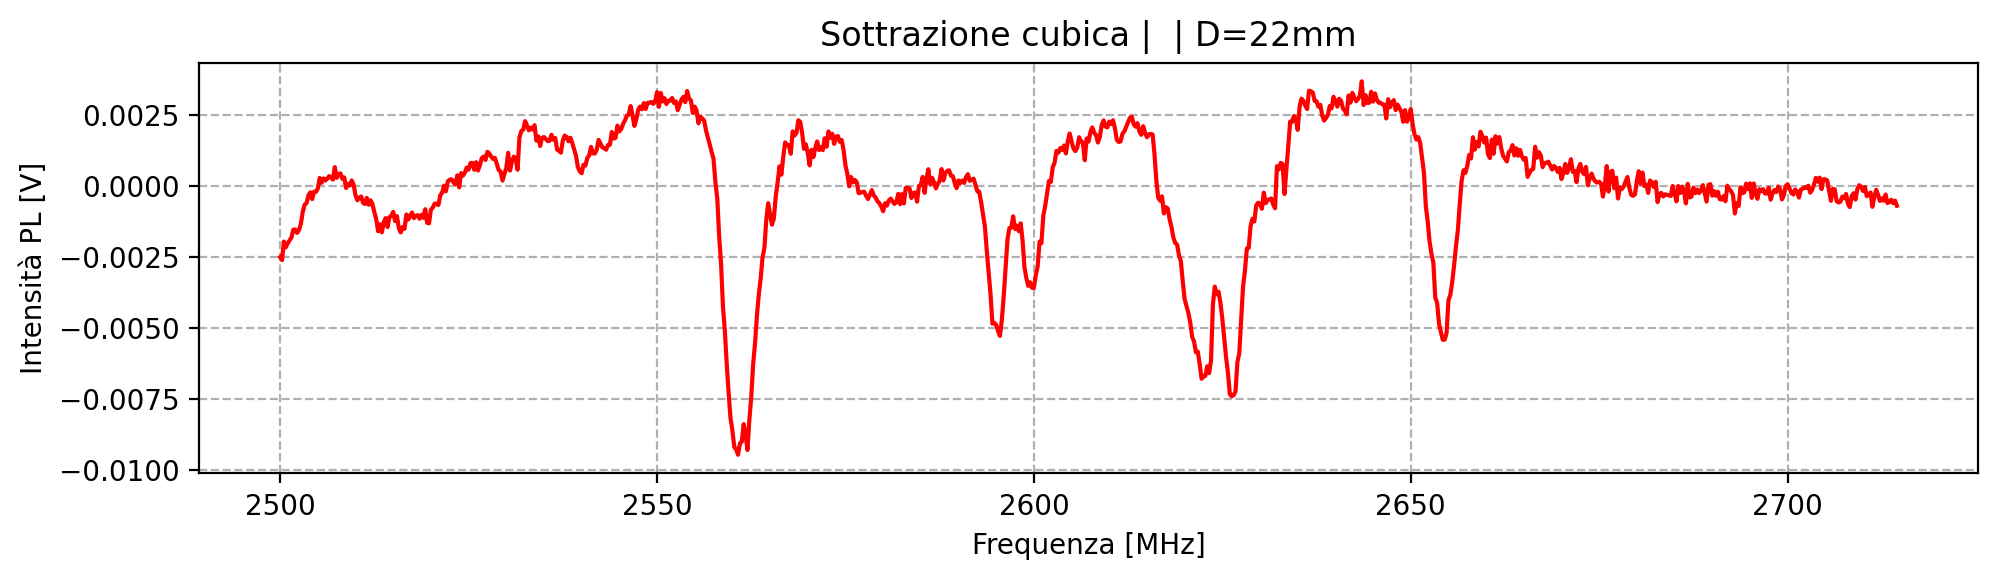

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 2.12111441e-09 -1.74407568e-05  4.77642555e-02 -4.22390622e+01]


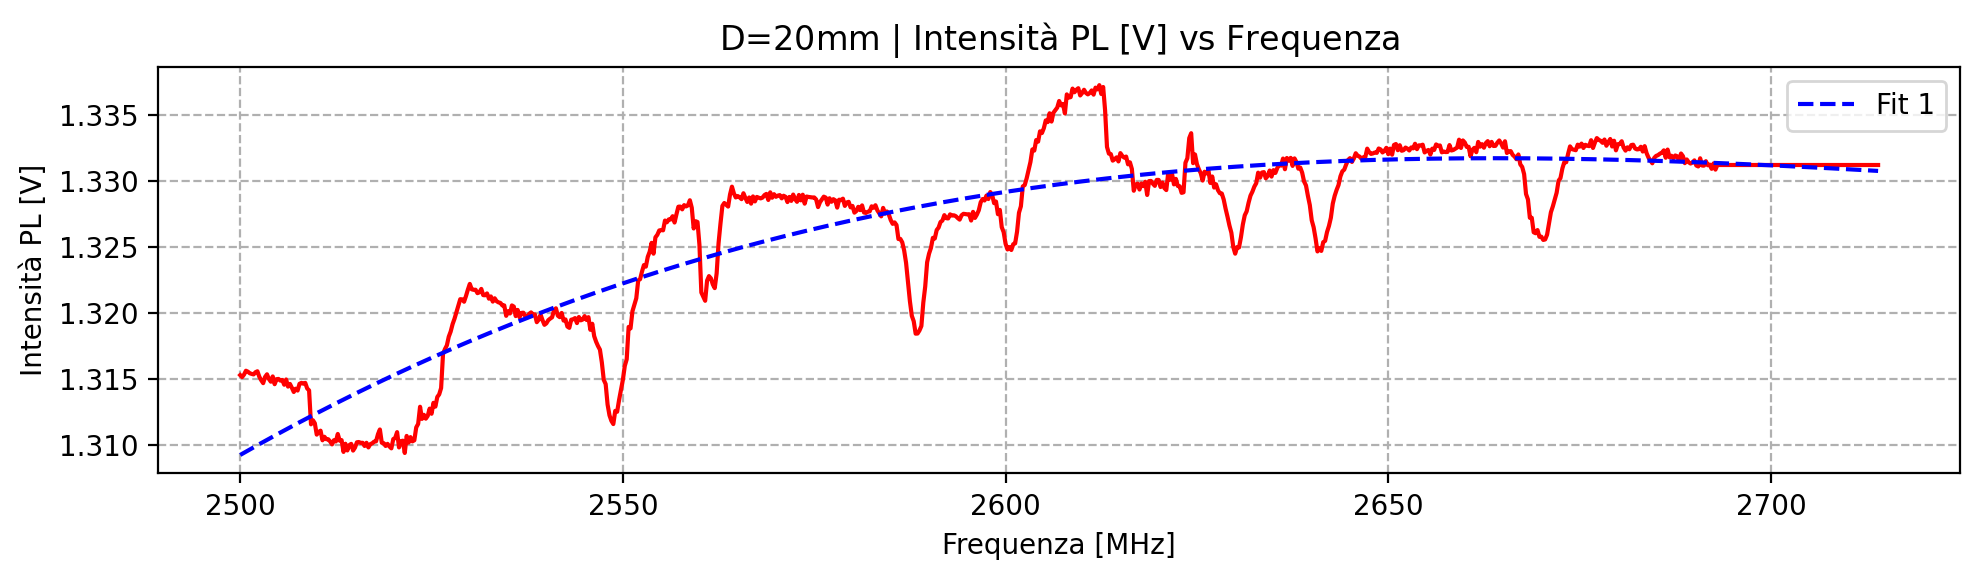

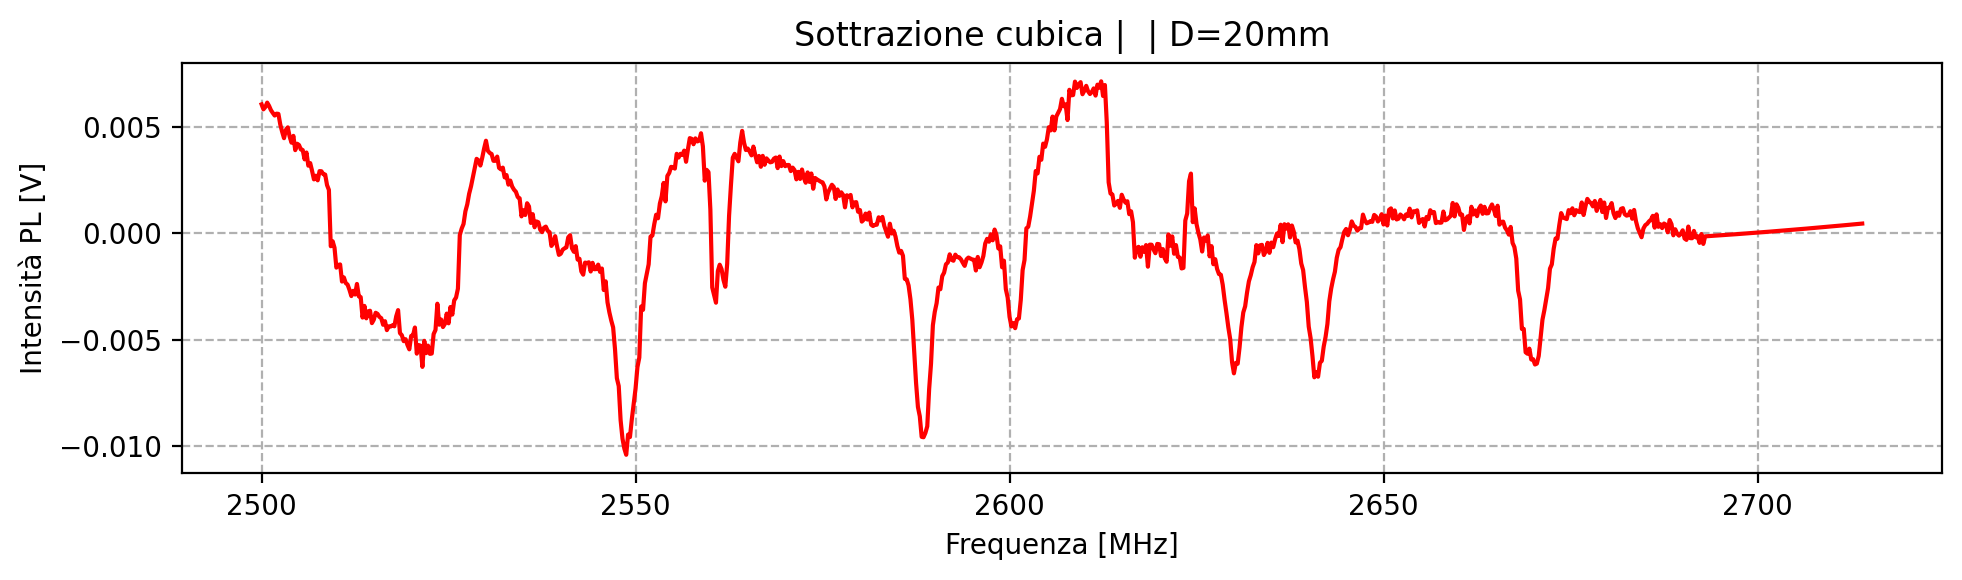

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 1.56844089e-09 -1.18788155e-05  2.99442516e-02 -2.40818868e+01]


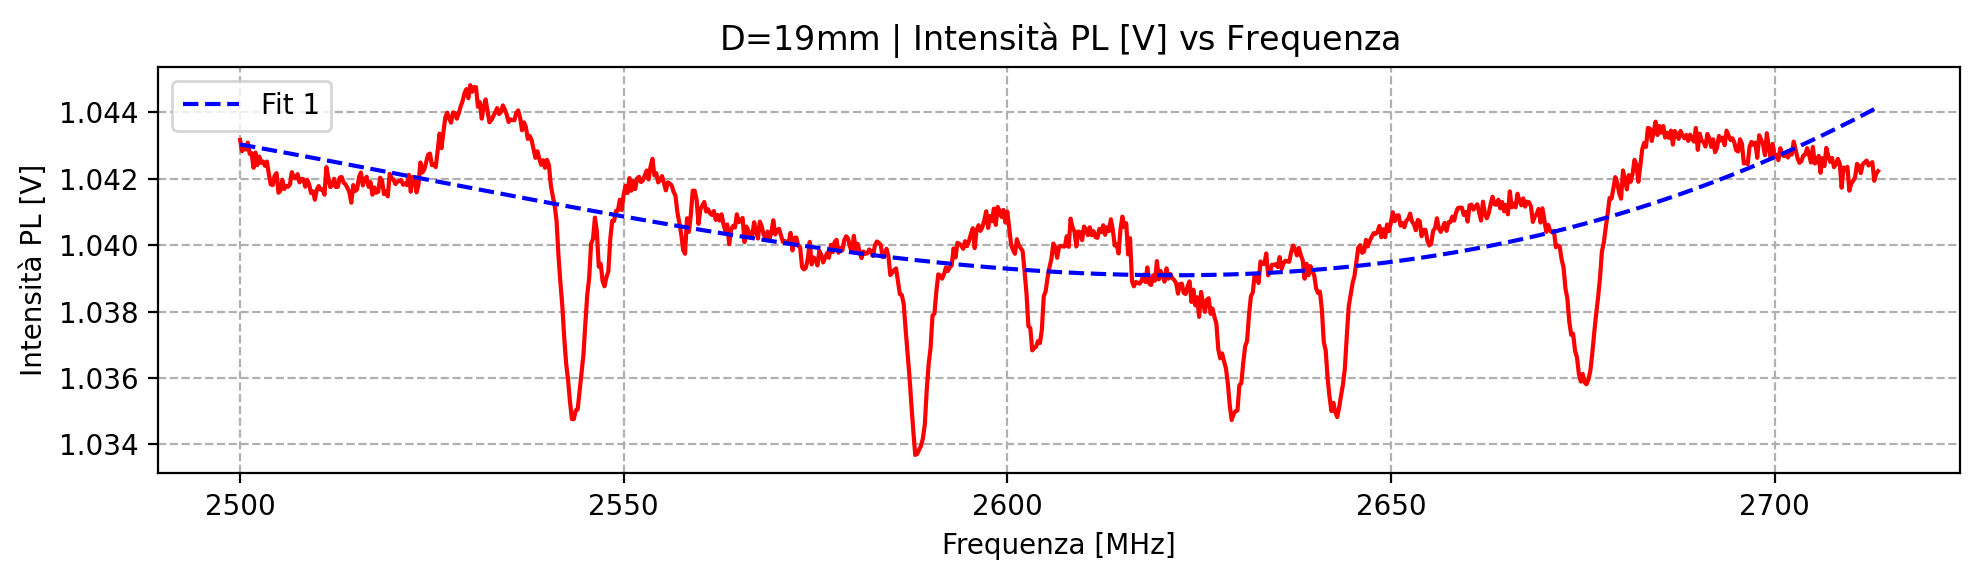

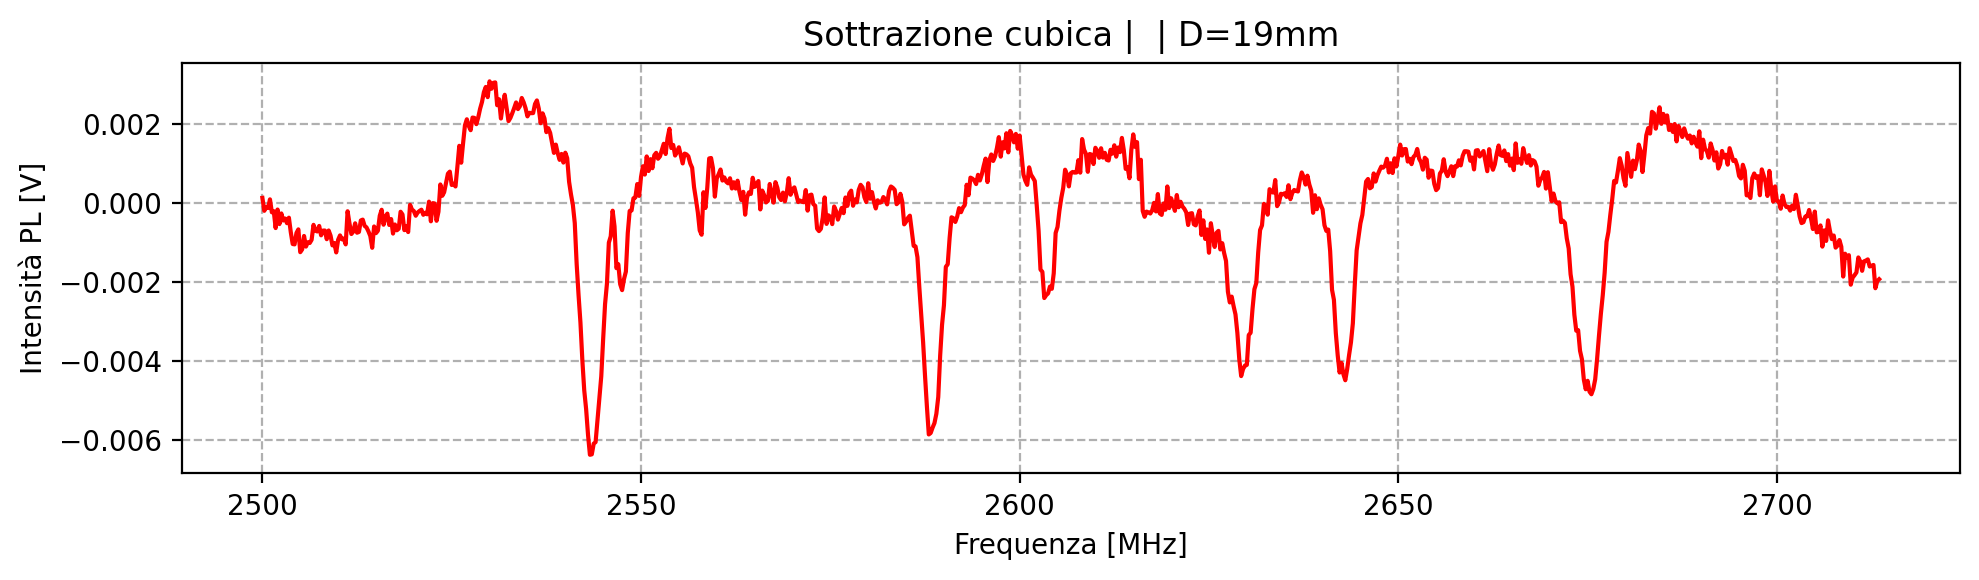

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-4.29687619e-09  3.40966712e-05 -9.00945038e-02  8.05126366e+01]


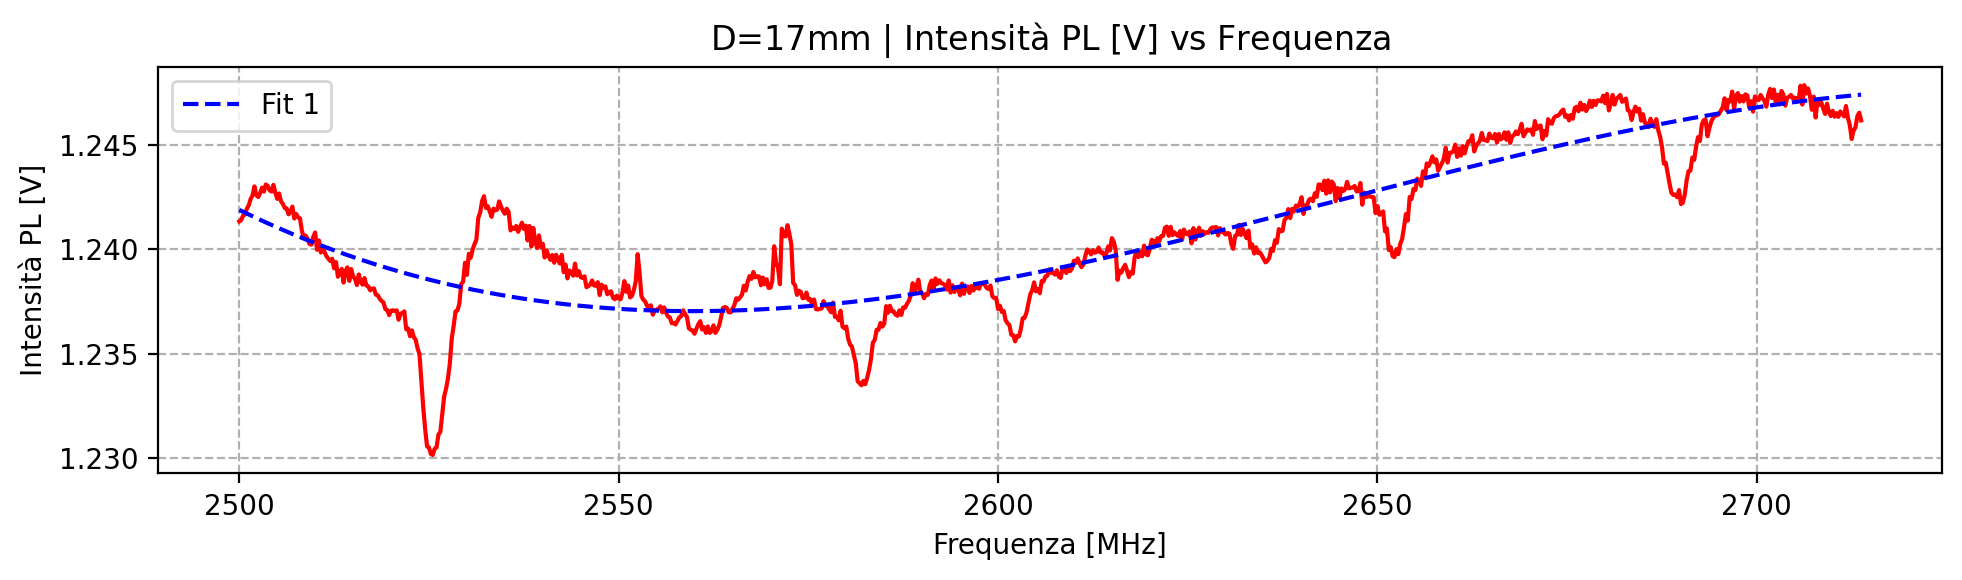

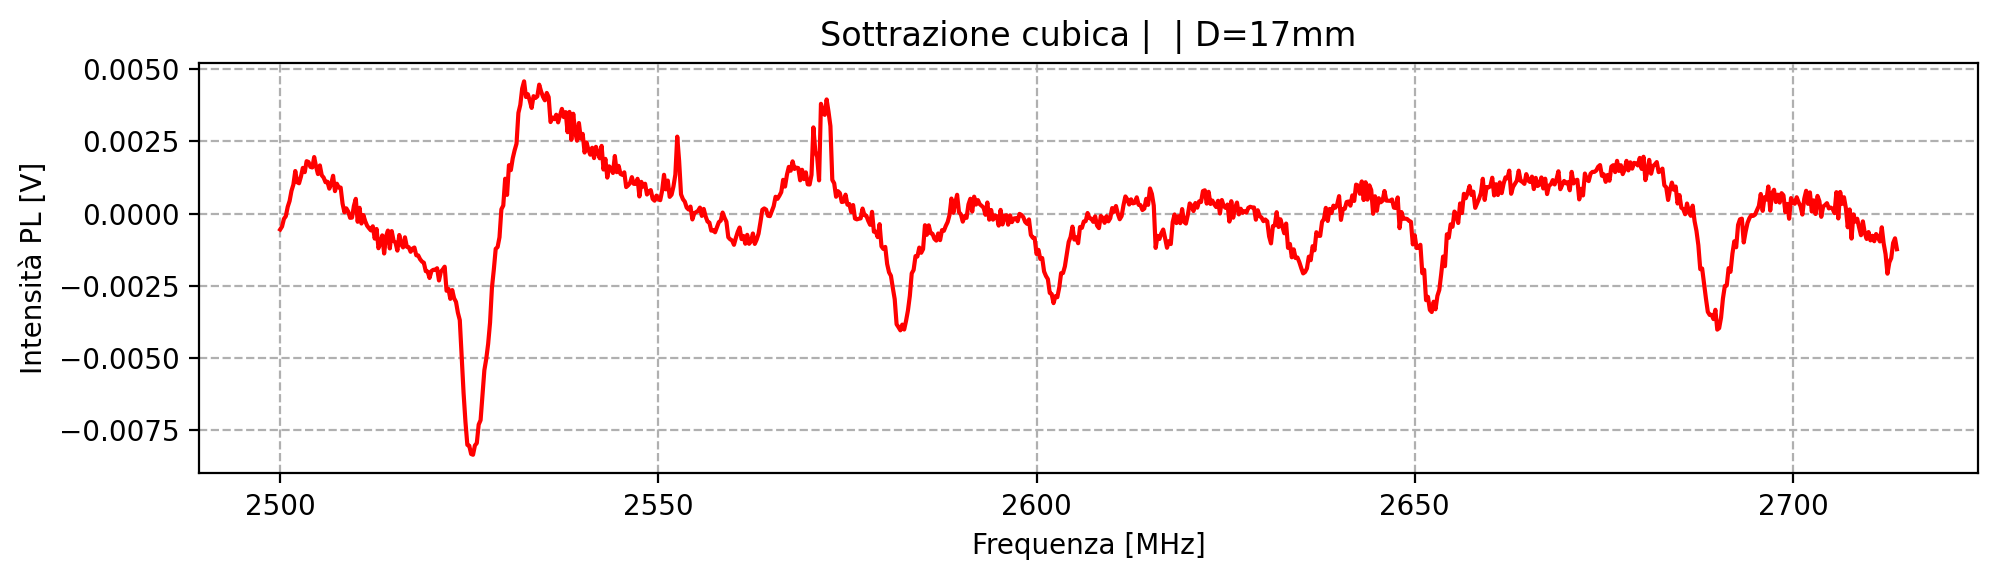

In [80]:
for i, dist in enumerate( reversed(distanze) ):
    
    spettro = spettri[i]
    
    # 1: polinomio su tutto lo spettro #
    # questo è il primo fit del background, fatto con una cubica
    popt0, fit_curve0 = fit_sin_odmr(spettro, 'od', fit_func=cub_func)
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve0])
    
    # sottraiamo il background (cubica)
    remove_background(spettro, 'od', fit_curve=fit_curve0, fit_func=cub_func, popt=popt0)
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione cubica | ')
    
    # 2: sinusoide smorzata su tutto lo spettro #
    '''
    # poi in realtà la prima regione a sx sembra un po' sinusoidale
    sin_p0 = [-0.005, 25, 0.2, 2500, 0.001, 0.007]
    popt1, fit_curve1 = fit_sin_odmr(spettro, 'od', fit_func=sin_var_func, region=vec_regione_sx[i], p0=sin_p0)
    popt2, fit_curve2 = fit_sin_odmr(spettro, 'od', fit_func=sin_var_func, p0=popt1)
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve1, fit_curve2], title='Background sinusoidale | ')
    # sottraiamo il background
    remove_background(spettro, 'od', fit_curve=fit_curve2, fit_func=sin_var_func, popt=popt2)
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione sinusoide | ')
    
    # 3: quello che resta! # #boh... un seno quadro forse?
    popt3, fit_curve3 = fit_sin_odmr(spettro, 'od', fit_func=sin_quadro_var_func, region=vec_regione_sx[i], p0=sin_p0)
    popt4, fit_curve4 = fit_sin_odmr(spettro, 'od', fit_func=sin_quadro_var_func, p0=popt1)
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve3, fit_curve4], title='Background sinusoidale quadro | ')
    # sottraiamo il background
    remove_background(spettro, 'od', fit_curve=fit_curve3, fit_func=sin_quadro_var_func, popt=popt3, regione=vec_regione_sx[i])
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione seno quadro | ')
    
    # 4: quello che rimane a destra! #
    popt5, fit_curve5 = fit_sin_odmr(spettro, 'od', fit_func=cub_func, region=vec_regione_dx[i])
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve5])
    
    # sottraiamo il background
    remove_background(spettro, 'od', fit_curve=fit_curve5, fit_func=cub_func, popt=popt5, regione=vec_regione_dx[i])
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione cubica a DX | ')
    '''

### Normalizzazione

Estremamente poco efficiente ciclare quattro volte, lo so, ma è la correzione più semplice a cui ho pensato.

In [81]:
minimo_assoluto = 1000

for i, dist in enumerate( reversed(distanze) ):
    
    min_provvisorio = np.min(spettri[i]['od'])
        
    if min_provvisorio < minimo_assoluto: minimo_assoluto = min_provvisorio
    
# normalizzo tutti gli spettri al minimo assoluto
for i in range(len(spettri)):
    spettri[i]['od'] = spettri[i]['od'] / np.abs(minimo_assoluto)

## FIT LORENTZIANO

Ora fitto con lorentziana+background lineare. Uso una singola funzione per ciascun deep; forse nei primi spettri sarebbe meglio usare somma di lorentziane. Per fittare sicuramente serve dichiarare prima quanti deep cercare in ciascun spettro e dove cercarli. 

In [82]:
Num_of_deeps = [2, 4, 4, 4, 6, 6, 6, 6, 6, 6]
Central_regions = [
    (2585, 2625),
    (2585, 2630),
    (2580, 2635),
    (2575, 2640),
    (2575, 2640),
    (2560, 2665),
    (2550, 2665),
    (2540, 2680),
    (2530, 2680),
    (2515, 2695)
]

Sarebbe opportuno anche dargli indicativamente il centro di ciascun deep. Questo è un lavoro terribile.

In [83]:
Centers = [
    (2600, 2610), # 2 - INF
    (2595, 2605, 2615, 2625), # 4 - 40
    (2595, 2605, 2615, 2625), # 4 - 39
    (2590, 2600, 2620, 2630), # 4 - 33
    (2580, 2600, 2605, 2615, 2620, 2630), # prima 4, poi 6 - 30 [ho aggiunto 2605 e 2620]
    (2570, 2590, 2605, 2620, 2630, 2650), # 6 - 24 
    (2560, 2595, 2600, 2620, 2630, 2655), # 6 - 22
    (2550, 2585, 2600, 2630, 2640, 2670), # 6 - 20
    (2545, 2585, 2605, 2630, 2645, 2675), # 6 - 19
    (2525, 2580, 2605, 2635, 2650, 2690), # 6 - 17
]

Raccolgo i centri dei deep trovati in un dict. Le key saranno le distanze.

In [84]:
fit_results = {}

Fit insieme:
0. A=0.5806163644125618, gamma=4.292276938337021, nu0=2600.2690366180364
1. A=0.4892779303344693, gamma=2.836611642700252, nu0=2610.5753969616476


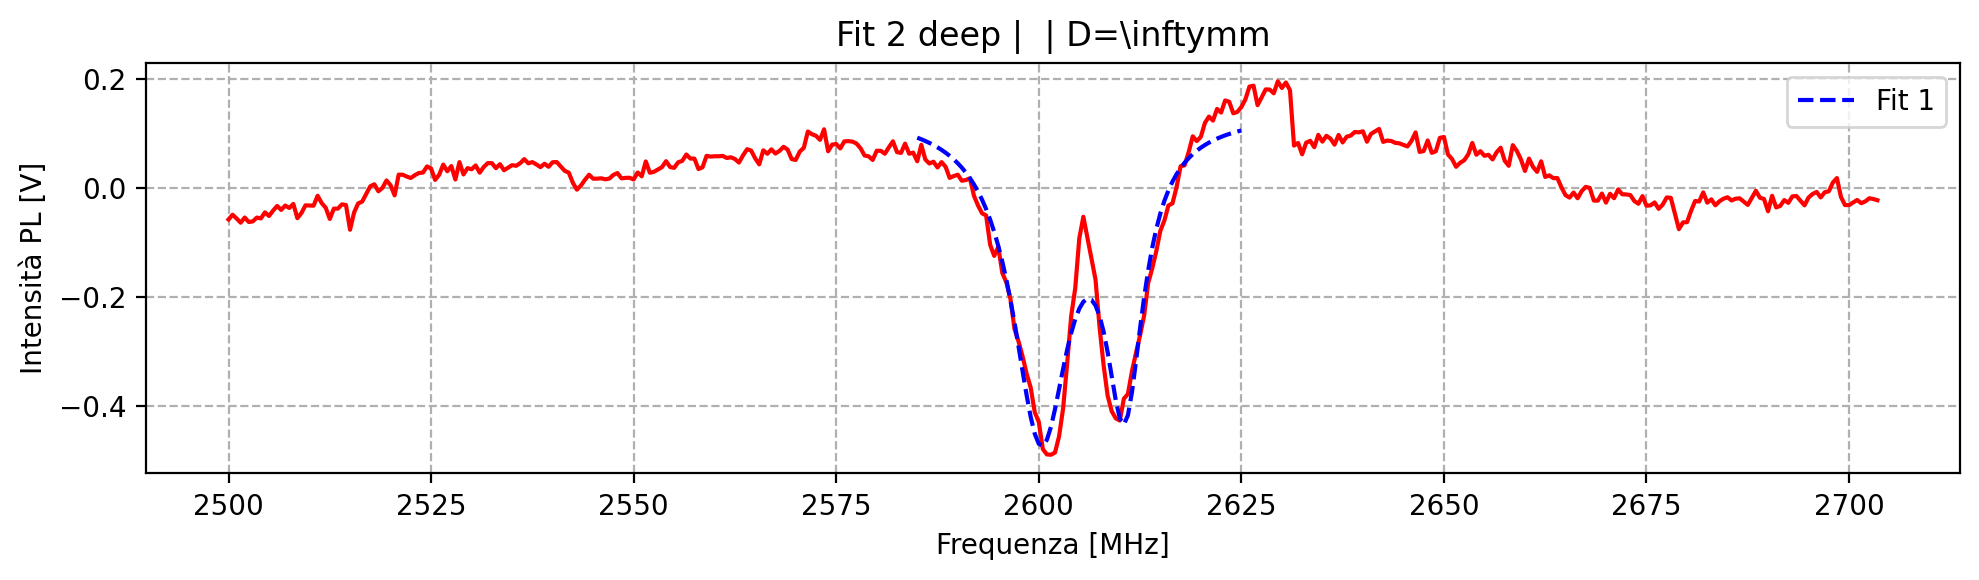

Fit insieme:
0. A=0.5865057951635058, gamma=1.4933851795391888, nu0=2596.2134868908784
1. A=0.9999999999999999, gamma=1.4200621118037005, nu0=2604.338916630954
2. A=0.9999999999999877, gamma=1.3772897488210918, nu0=2612.9204247066573
3. A=0.8207442999570527, gamma=4.232329777253584, nu0=2620.1949337707333


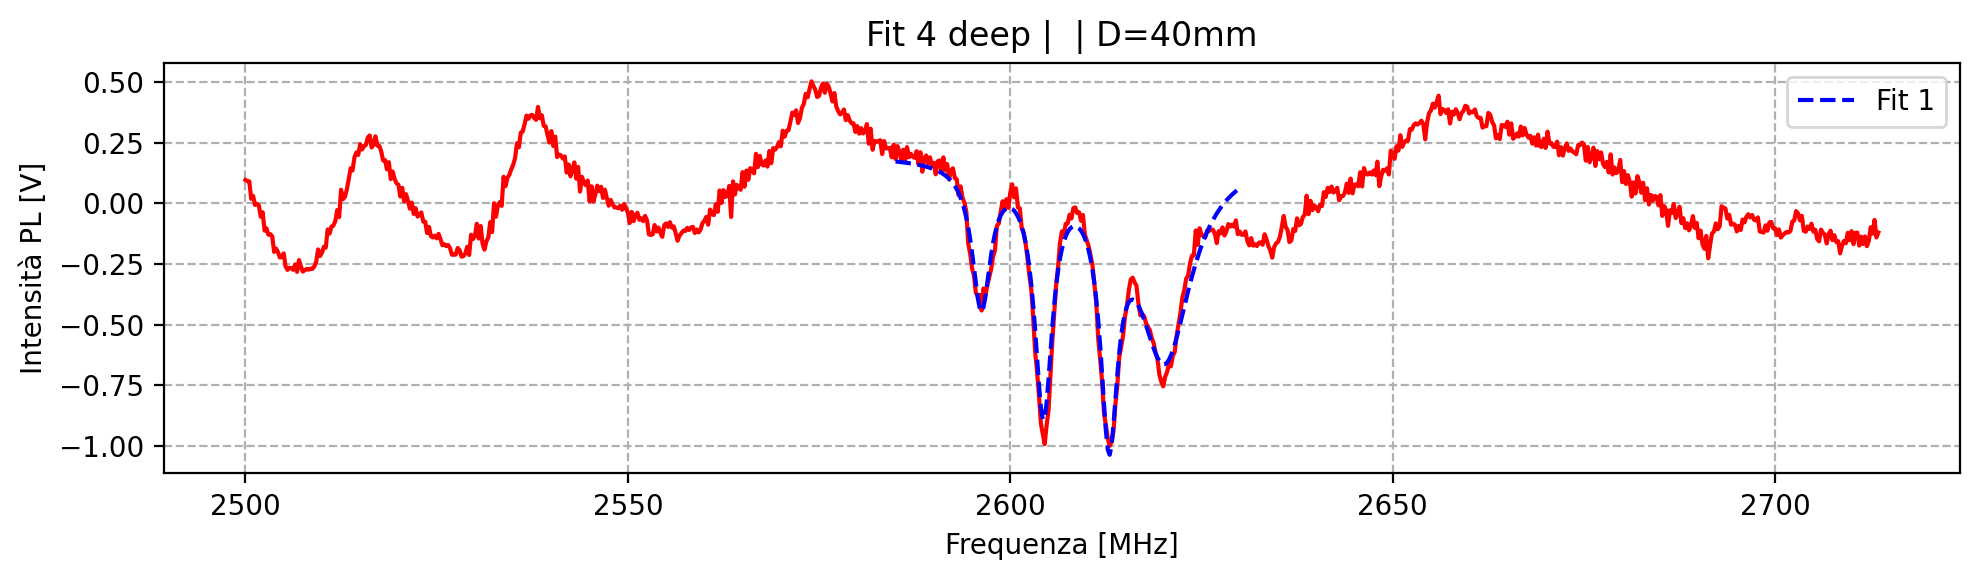

Fit insieme:
0. A=0.5756578688152328, gamma=1.1425014462517502, nu0=2596.6121623040153
1. A=0.9999999999999999, gamma=1.3120544259511508, nu0=2605.3155121635964
2. A=0.9999999999999999, gamma=1.4145534995029192, nu0=2614.3373708363424
3. A=0.7330258740292033, gamma=2.758552904980781, nu0=2621.925762506541


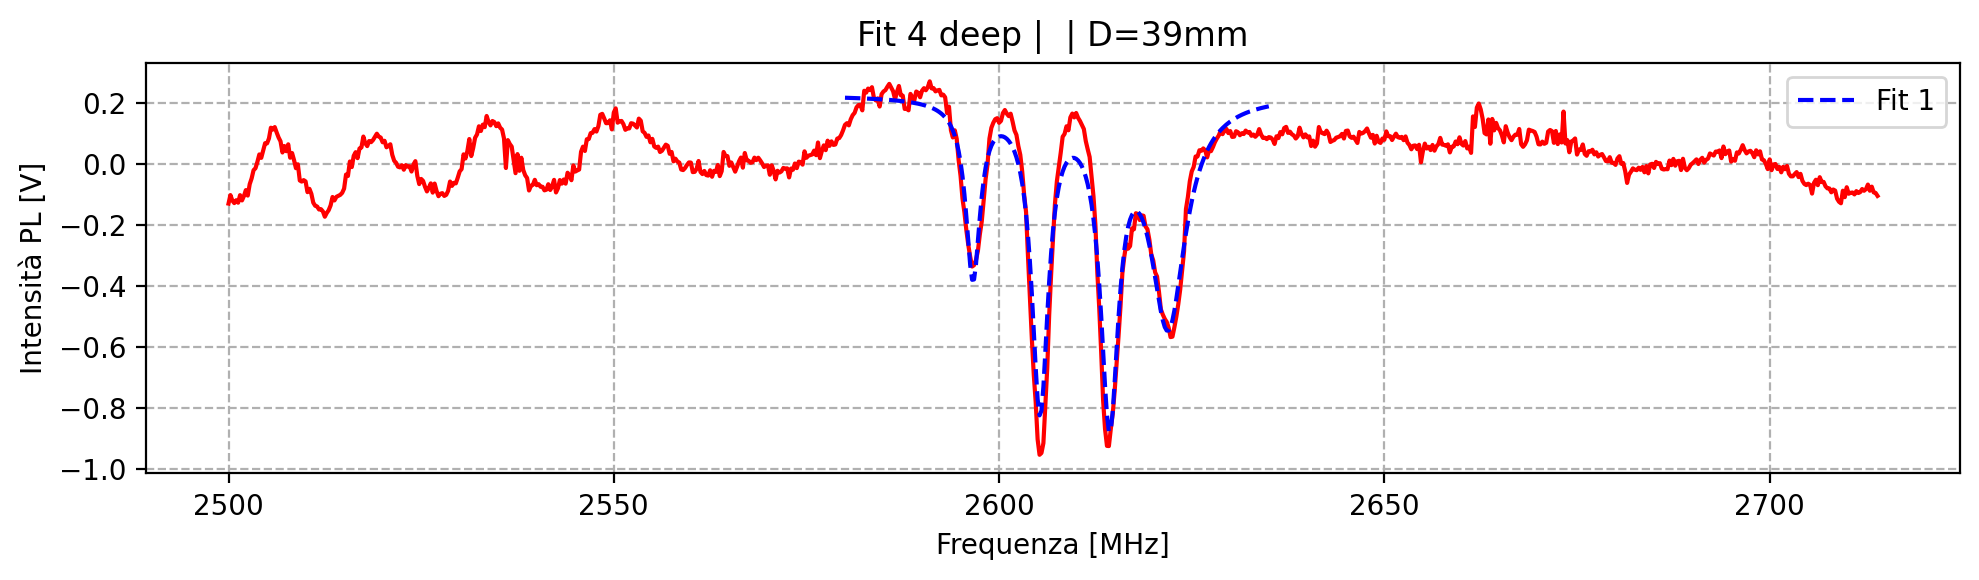

Fit insieme:
0. A=0.4819817628574424, gamma=1.8183773204572085, nu0=2590.0951022434797
1. A=0.4944412350271662, gamma=1.3352201996489081, nu0=2603.0162464507666
2. A=0.6726078251264391, gamma=1.6969355049541177, nu0=2616.9363532496614
3. A=0.5363122501791906, gamma=1.7429394731614472, nu0=2628.5256255190784


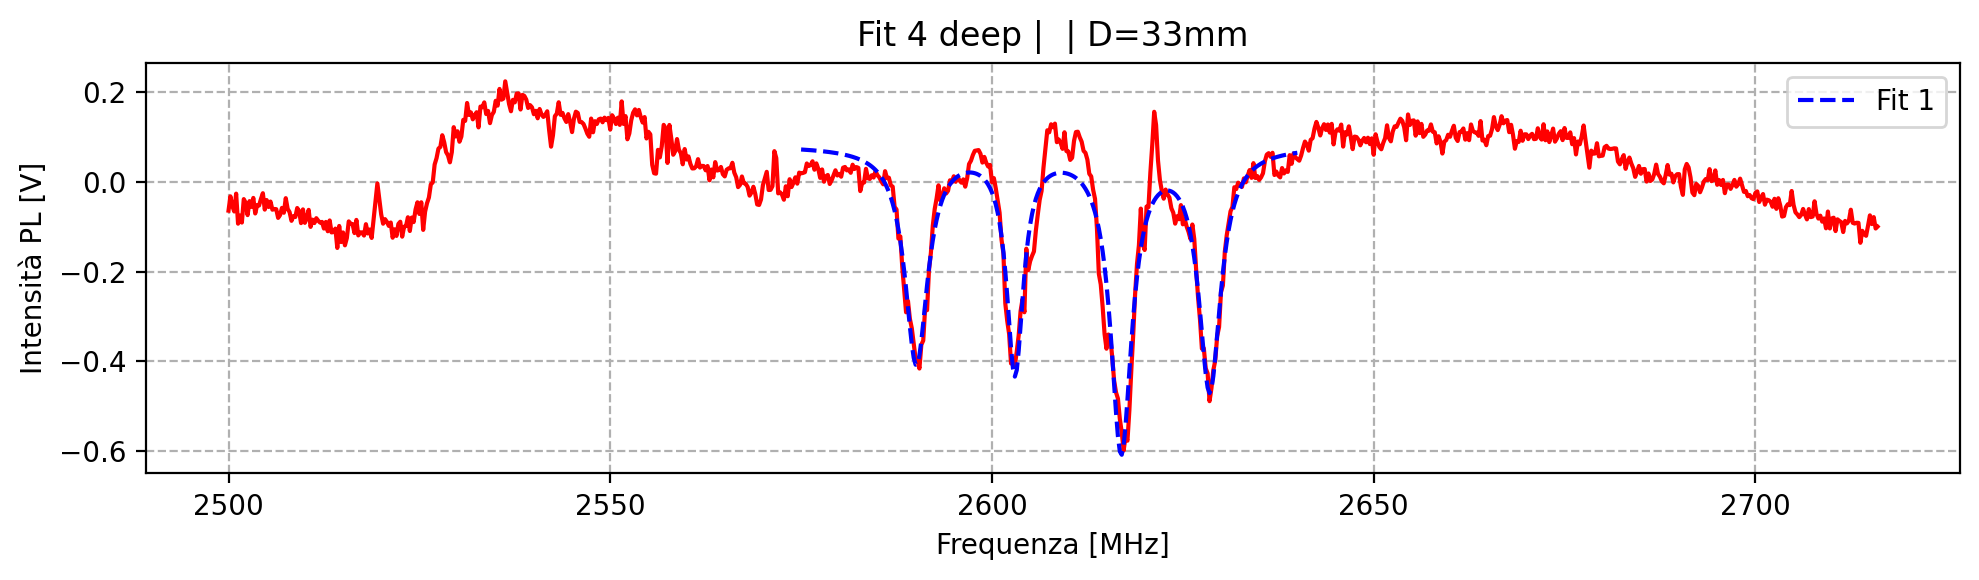

Fit insieme:
0. A=0.6163726507782461, gamma=1.1995541038794437, nu0=2584.9999999999995
1. A=0.5517059618131708, gamma=1.3998824571643618, nu0=2600.386923924723
2. A=0.5267860068454251, gamma=1.1498090079727679, nu0=2603.418543294309
3. A=0.5754086730817761, gamma=1.3670783412456835, nu0=2616.418527721688
4. A=0.6266467179391525, gamma=2.236834033574081, nu0=2619.178250858922
5. A=0.6072317352224552, gamma=1.9840995323519572, nu0=2632.682599588339


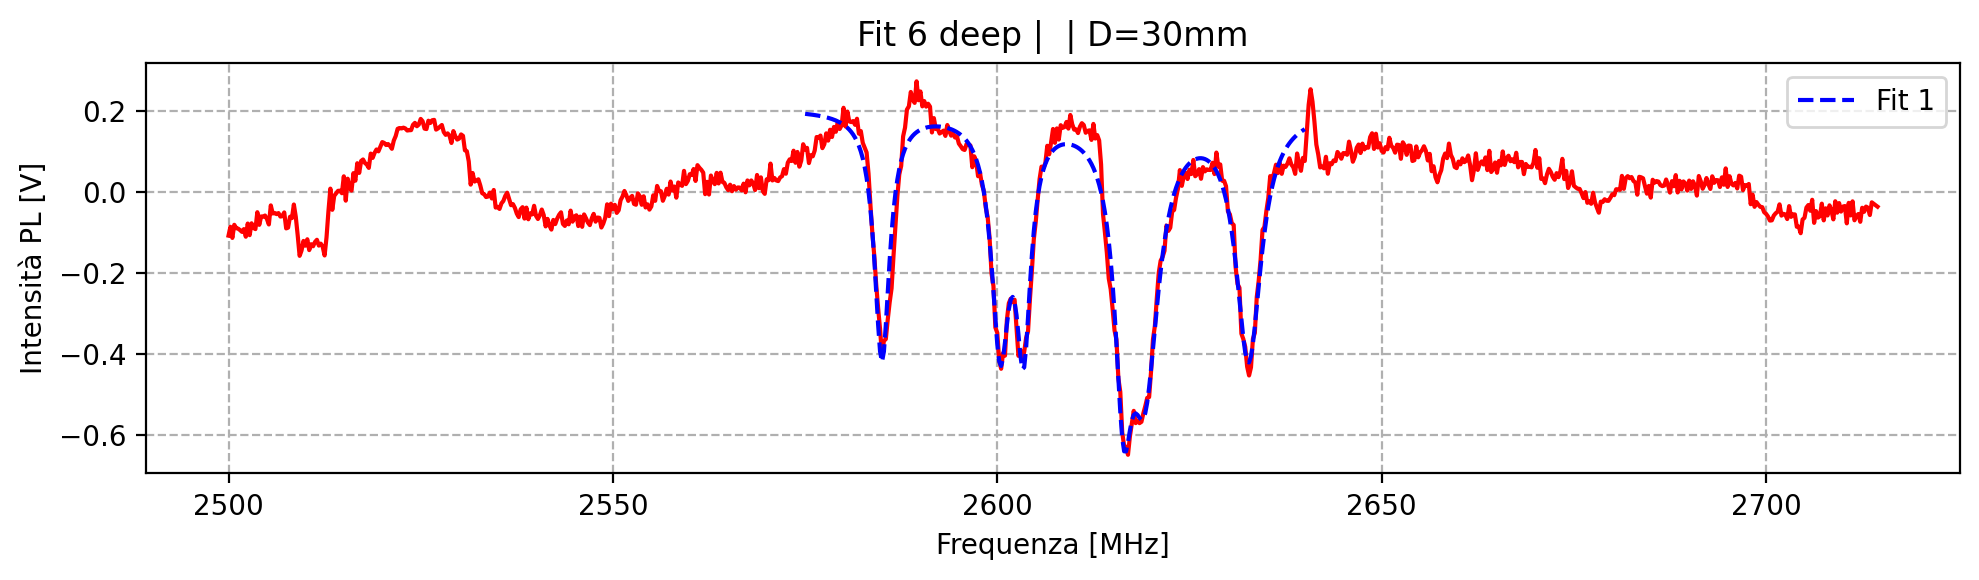

Fit insieme:
0. A=0.5456207277607316, gamma=1.7443608112700577, nu0=2568.7452592993486
1. A=0.5131325206871802, gamma=2.017419022496648, nu0=2594.561354940442
2. A=0.4733829401070576, gamma=1.128663589173553, nu0=2602.4498453203696
3. A=0.41392142387934205, gamma=1.776954528929894, nu0=2621.5052414038128
4. A=0.4740928917331297, gamma=1.5758616763474957, nu0=2629.170126391078
5. A=0.47615400773460914, gamma=1.6602122522922969, nu0=2650.019194987598


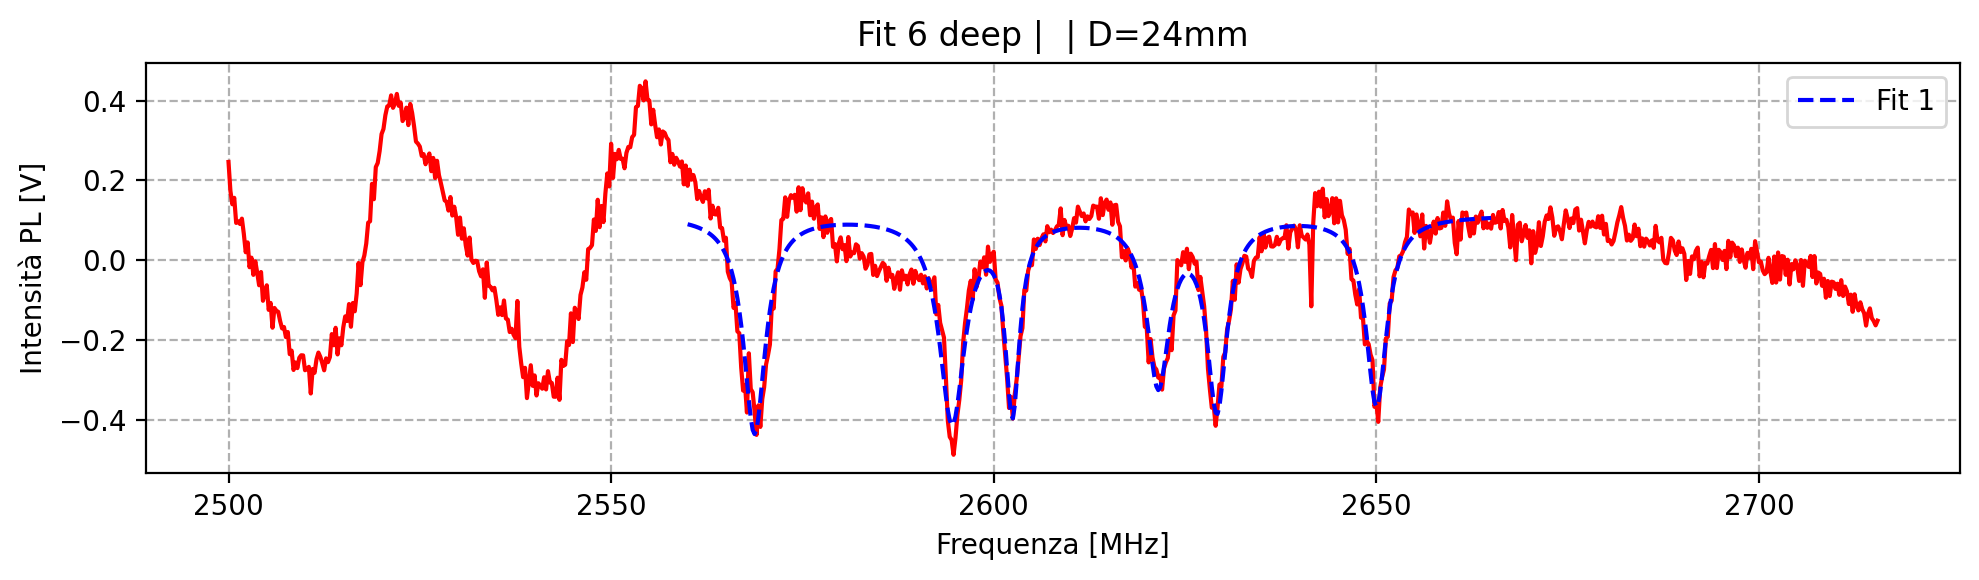

Fit separato:
0. A=0.9999999999999999, gamma=2.8632129395185055, nu0=2561.1387024948854
Fit insieme:
0. A=0.4218117554170018, gamma=2.186137728600078, nu0=2595.002907192577
1. A=0.32073634655224675, gamma=1.273429209615188, nu0=2599.8919565820966
2. A=0.5169473320498579, gamma=2.5582574951231307, nu0=2621.8055048096503
3. A=0.5016152659348928, gamma=1.7024382322766993, nu0=2626.574450314447
Fit separato:
0. A=0.5829903691120865, gamma=2.032361241460558, nu0=2654.3292047033433


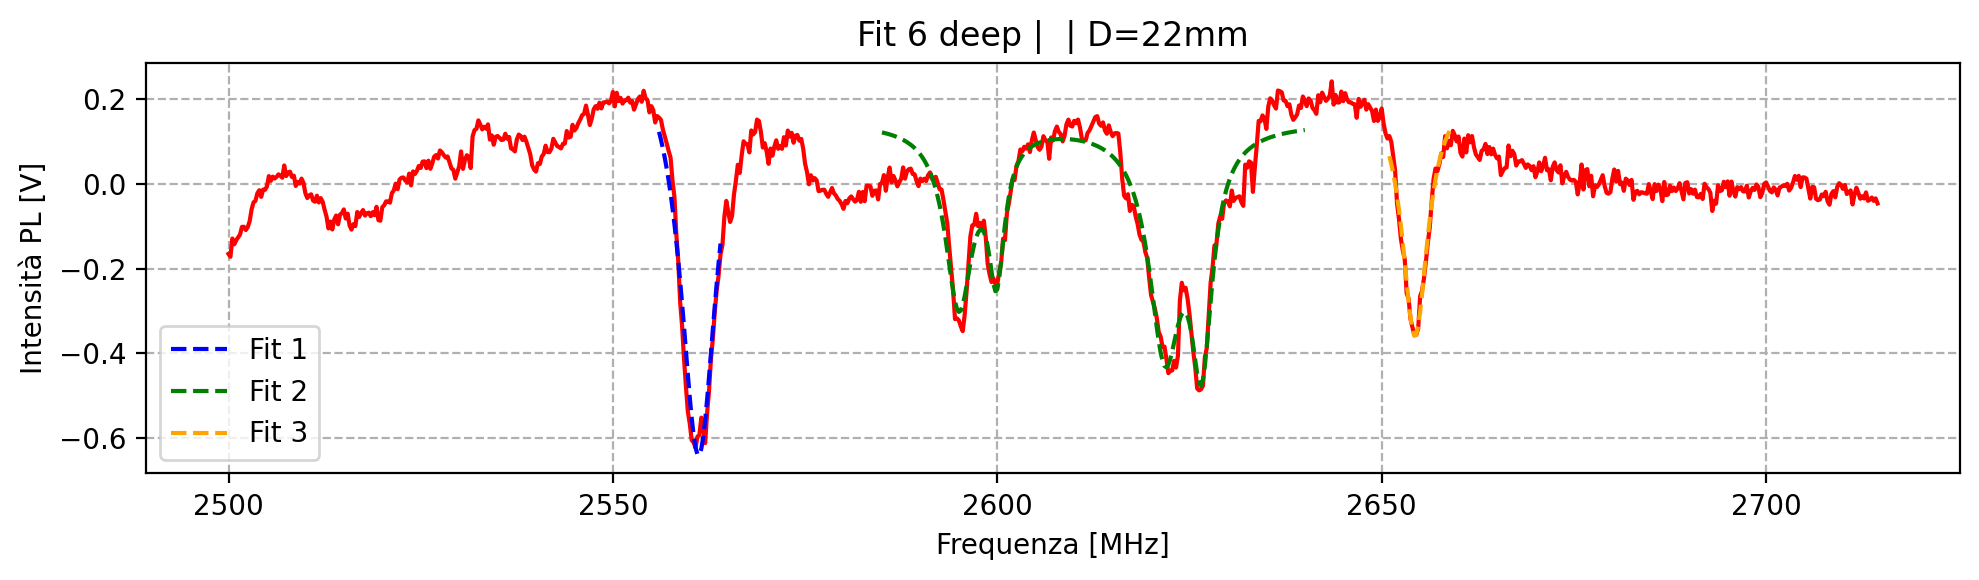

Fit separato:
0. A=0.9728918826018965, gamma=2.458732803527504, nu0=2548.771833559343
1. A=0.7295732139235596, gamma=1.4729416366741084, nu0=2588.4788491008653
2. A=0.39721642389026707, gamma=1.1675589519520877, nu0=2600.4461412188193
3. A=0.43881461053375975, gamma=1.432654923650216, nu0=2630.152472817295
4. A=0.53982558188947, gamma=1.66616901876226, nu0=2641.239537266274
5. A=0.666013993153927, gamma=2.521944796353441, nu0=2669.992781445593


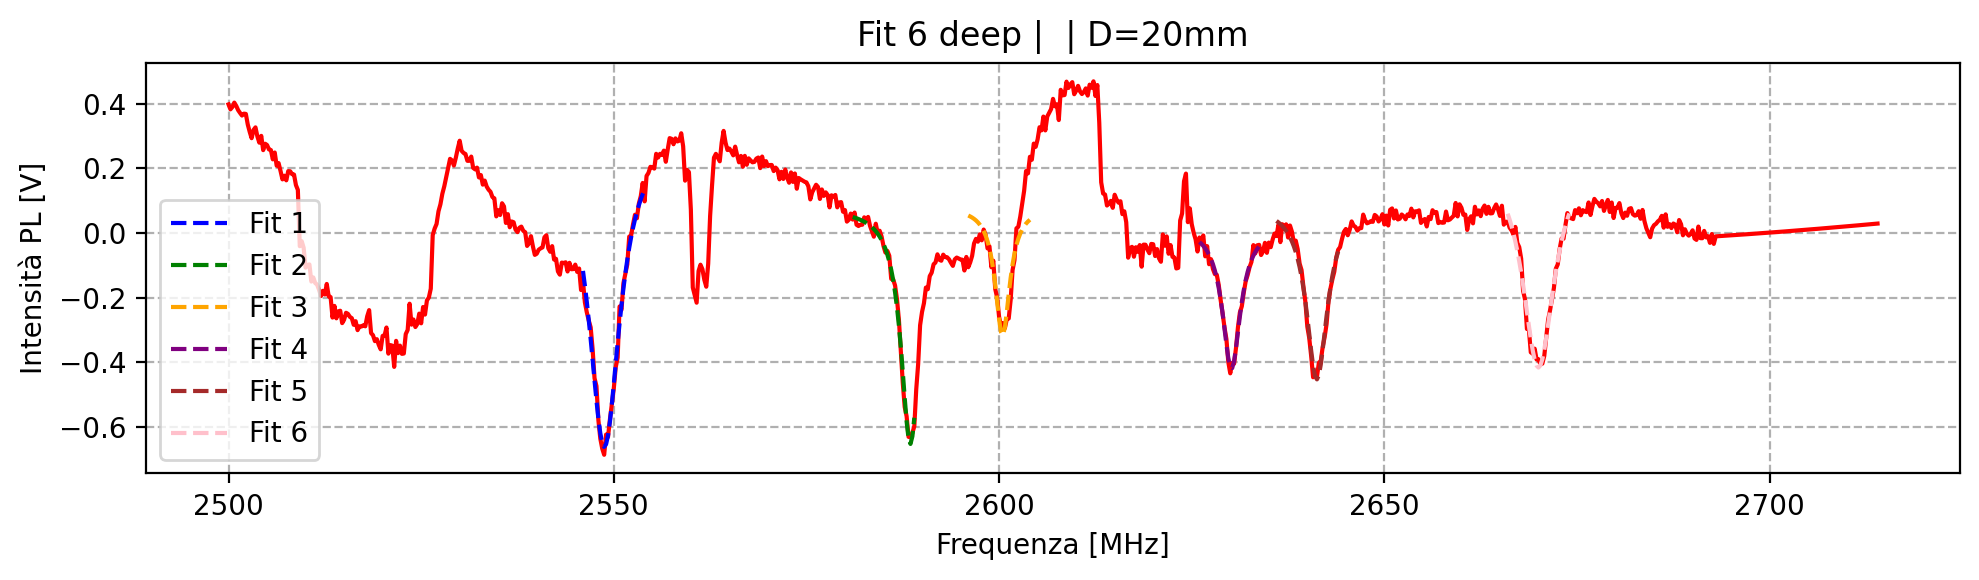

Fit separato:
0. A=0.4348184883468433, gamma=1.3051980663802192, nu0=2543.564798143558
1. A=0.44023646944819006, gamma=1.3192054660996928, nu0=2588.3627636661417
2. A=0.2648111379820739, gamma=1.2415315769729265, nu0=2603.7094509859608
3. A=0.36876502092647706, gamma=2.1967818761199127, nu0=2629.351917463046
4. A=0.4137819584702154, gamma=1.7170814011159328, nu0=2642.759467305
5. A=0.5493074539253048, gamma=2.9087175002606744, nu0=2675.0043580892607


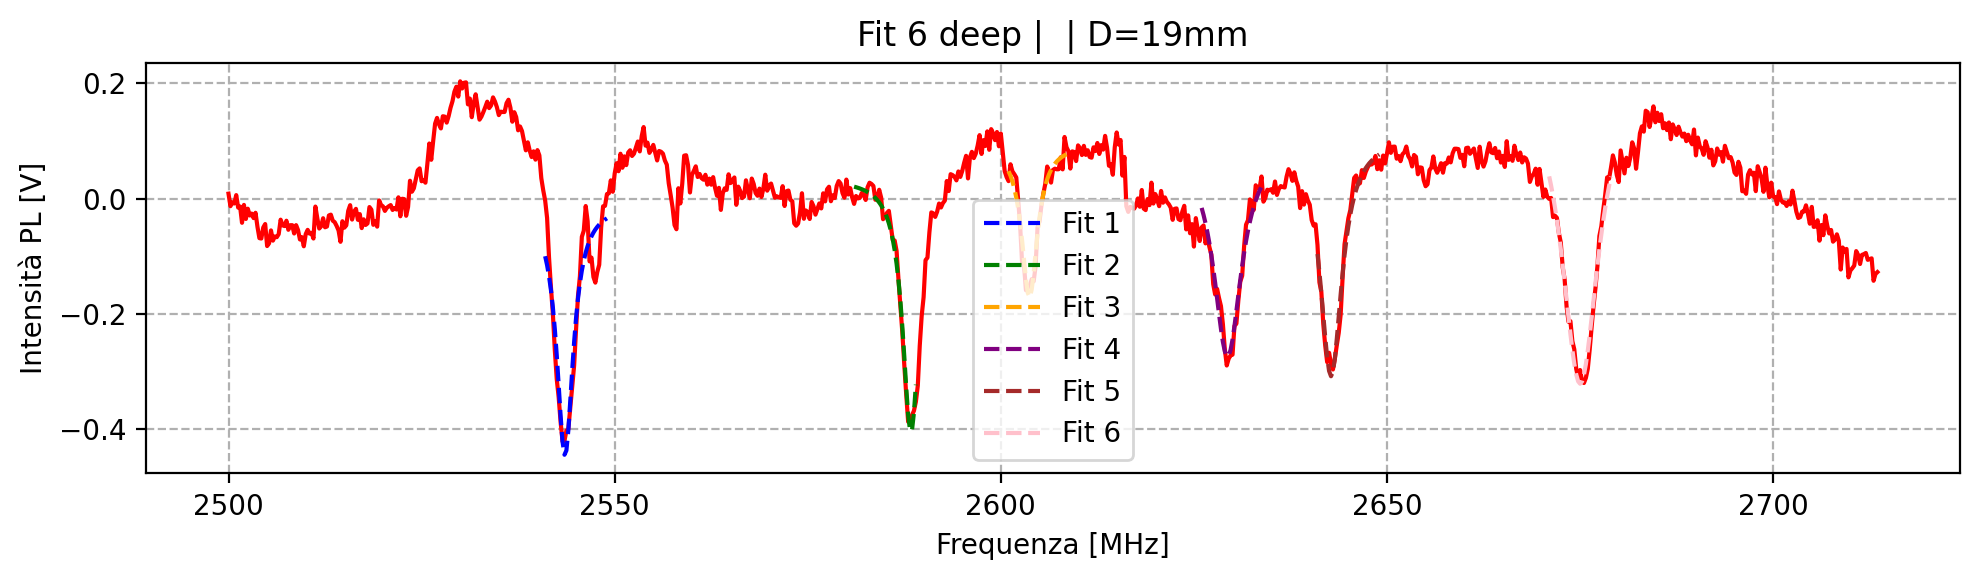

Fit separato:
0. A=0.5618279575724712, gamma=1.797476471207023, nu0=2525.486288598796
1. A=0.2920979371495058, gamma=1.6102276493760552, nu0=2582.1417255175415
2. A=0.19987384553943738, gamma=1.5885155884778632, nu0=2602.285192039935
3. A=0.146802669788336, gamma=1.8360157697182207, nu0=2635.123426717873
4. A=0.27113893932277455, gamma=1.850651143850173, nu0=2652.343414312025
5. A=0.3464049105361075, gamma=2.2742767578769074, nu0=2689.8397124060316


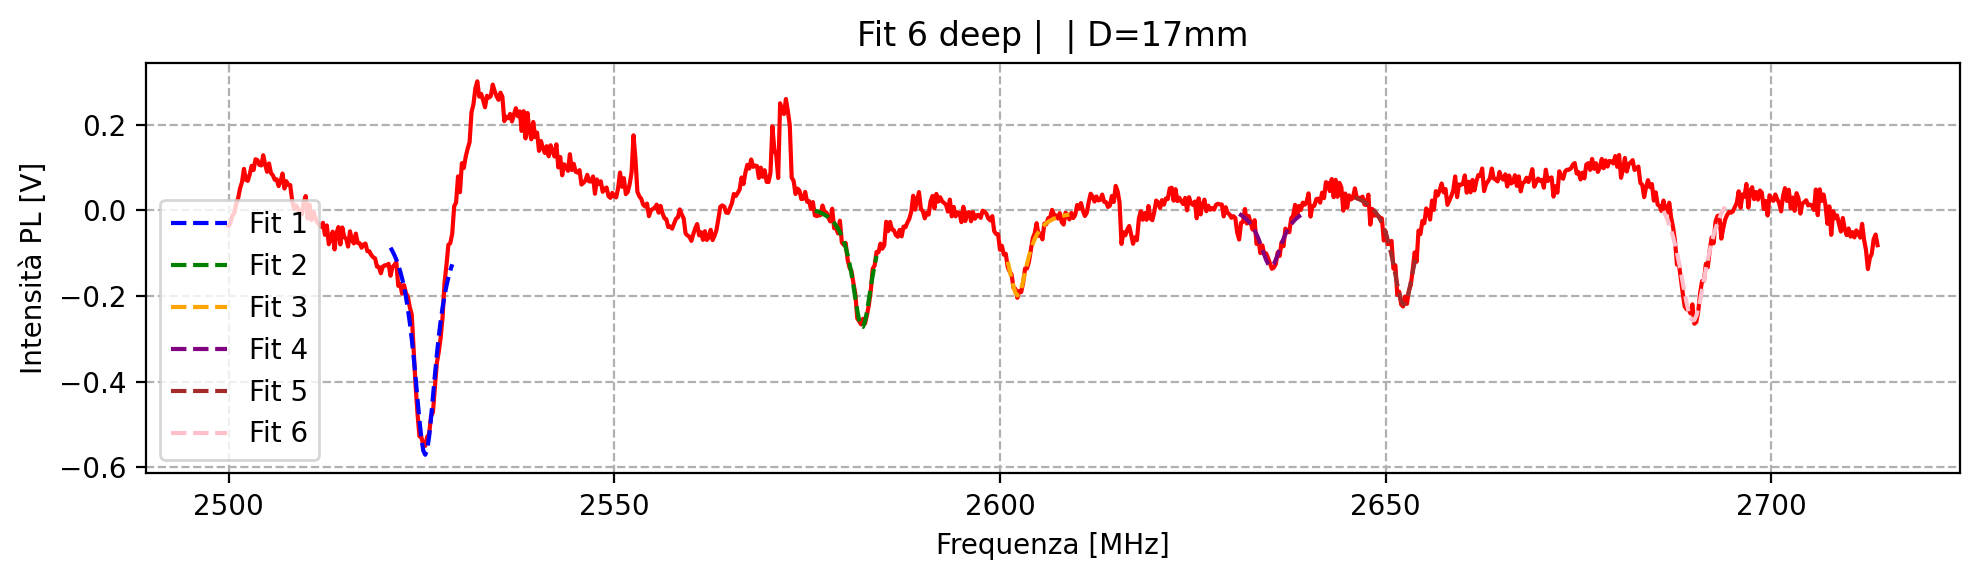

In [86]:
for idx, (N, region, dist, spettro) in enumerate(zip(Num_of_deeps, Central_regions, reversed(distanze), spettri)):
    
    fit_results[dist] = []
    
    # qui devono essere considerati insieme
    if idx < 6:
        params, curva = fitta_deep_insieme(spettro, N=N, regione=region, nu0s=Centers[idx])
        plot_odmr(spettro, 'od', dist=dist, fit_curves=[curva], title=f'Fit {N} deep | ')
        fit_results[dist] = [params[0][3*i+2] for i in range(N)]
    # in questo i 4 deep centrali vanno considerati insieme
    elif idx == 6:
        params_sx, curva_sx = fitta_deep_separati(spettro, N=1, regione=region, nu0s=[2560])
        fit_results[dist] = [params_sx[0][0][0][2]]
        params_centro, curva_centro = fitta_deep_insieme(spettro, N=4, regione=(2585,2640), nu0s=[2595, 2600, 2620, 2630])       
        fit_results[dist] += [params_centro[0][3*i+2] for i in range(4)] 
        params_dx, curva_dx = fitta_deep_separati(spettro, N=1, regione=region, nu0s=[2655])
        fit_results[dist] += [params_dx[0][0][0][2]]

        lista_di_curve = curva_sx + [curva_centro] + curva_dx
        plot_odmr(spettro, 'od', dist=dist, fit_curves=lista_di_curve, title=f'Fit {N} deep | ')
    # qui, per evitare di considerare troppo il background, li considero separati
    else:
        params, n_curve = fitta_deep_separati(spettro, N=N, regione=region, nu0s=Centers[idx])
        plot_odmr(spettro, 'od', dist=dist, fit_curves=n_curve, title=f'Fit {N} deep | ')
        fit_results[dist] = [params[i][0][0][2] for i in range(N)]

In [87]:
fit_results

{1000: [np.float64(2600.2690366180364), np.float64(2610.5753969616476)],
 40: [np.float64(2596.2134868908784),
  np.float64(2604.338916630954),
  np.float64(2612.9204247066573),
  np.float64(2620.1949337707333)],
 39: [np.float64(2596.6121623040153),
  np.float64(2605.3155121635964),
  np.float64(2614.3373708363424),
  np.float64(2621.925762506541)],
 33: [np.float64(2590.0951022434797),
  np.float64(2603.0162464507666),
  np.float64(2616.9363532496614),
  np.float64(2628.5256255190784)],
 30: [np.float64(2584.9999999999995),
  np.float64(2600.386923924723),
  np.float64(2603.418543294309),
  np.float64(2616.418527721688),
  np.float64(2619.178250858922),
  np.float64(2632.682599588339)],
 24: [np.float64(2568.7452592993486),
  np.float64(2594.561354940442),
  np.float64(2602.4498453203696),
  np.float64(2621.5052414038128),
  np.float64(2629.170126391078),
  np.float64(2650.019194987598)],
 22: [np.float64(2561.1387024948854),
  np.float64(2595.002907192577),
  np.float64(2599.8919565

# FREQUENZA V DISTANZA

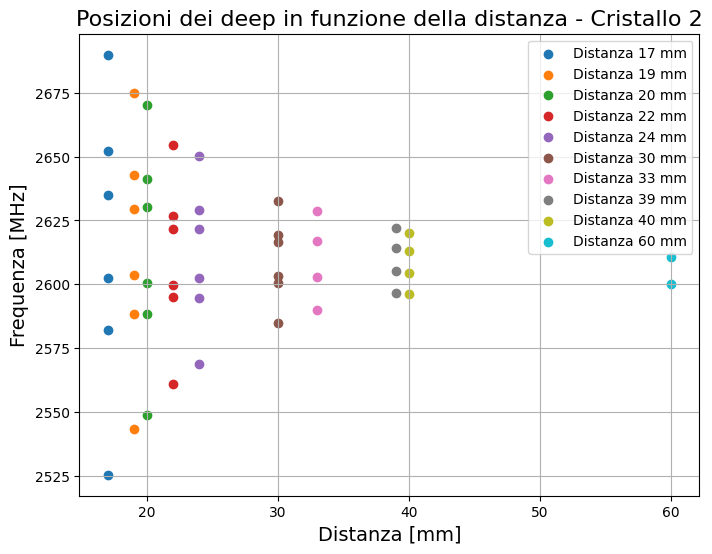

In [96]:
plt.figure(figsize=(8,6))
plt.title(f'Posizioni dei deep in funzione della distanza - Cristallo 2', fontsize=16)
plt.xlabel('Distanza [mm]', fontsize=14)
plt.ylabel('Frequenza [MHz]', fontsize=14)
distanze_esatte = distanze[:-1] + [60]  # metto 60 mm invece di infinito
for dist, dist_e in zip(distanze, distanze_esatte):
    plt.scatter([dist_e]*len(fit_results[dist]), fit_results[dist], label=f'Distanza {dist_e} mm')
plt.legend()
plt.grid()
plt.show()